# Imports

In [1]:
# prompt: Import libraries and open CSV

import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt


In [2]:
file_path = 'C:\\Users\\dfber\\Downloads\\e26f9ccc-68a4-42b4-9d0d-508a83026a1c.csv'
raw_df = pd.read_csv(file_path)
raw_df.head()

C:\Users\dfber\AppData\Local\Temp\ipykernel_20900\4288859255.py:2: DtypeWarning: Columns (18,110) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(file_path)


,id,epic_pmrn,delivery_date,delivery_time,pregnancy_outcome,newborn_gestational_age,gestational_age_2052,anesthesia_epidural_2062,anesthesia_general_2063,anesthesia_local_2064,...,anes_procedure_spinal_needle_gauge_2268,anes_procedure_spinal_needle_length_2269,anes_procedure_paresthesias_2270,anes_procedure_note_text_2271,anes_procedure_encounter_id_2273,maternal_dob_2043,maternal_language_2113,marital_status_2184,country_of_origin_2186,employment_status_2187
0,1,10048619033,2018-01-31,11:55:00-05:00,term,276.0,276.0,False,False,False,...,NaN,NaN,NaN,NaN,NaN,1984-06-25,english,married,united states,not employed
1,2,10048003501,2018-01-31,03:02:24-05:00,term,279.0,279.0,True,False,False,...,NaN,NaN,no,NaN,3180955539,1977-10-27,english,married,united states,full time
2,3,10063210025,2015-08-01,00:30:00-04:00,term,280.0,280.0,True,False,False,...,NaN,NaN,transient,Right sided paresthesia with the catheter thre...,3081234798,1981-01-31,english,married,united states,full time
3,4,10055528323,2015-08-04,18:19:56-04:00,term,273.0,273.0,False,False,False,...,NaN,NaN,no,NaN,3081648579,1976-02-29,english,married,NaN,full time
4,5,10078242548,2015-08-30,16:08:00-04:00,term,288.0,288.0,True,False,False,...,NaN,NaN,no,NaN,3084361541,1995-05-14,english,single,united states,not employed


# Initialize dataframe

In [3]:
df = raw_df.copy()

In [4]:
pd.set_option("display.max_columns", None)
df.head()

,id,epic_pmrn,delivery_date,delivery_time,pregnancy_outcome,newborn_gestational_age,gestational_age_2052,anesthesia_epidural_2062,anesthesia_general_2063,anesthesia_local_2064,anesthesia_pudendal_2065,anesthesia_spinal_2066,delivery_site_2188,induction_oxytocin_2189,induction_cervical_balloon_2190,induction_misoprostol_2191,induction_arom_2192,induction_foley_easy_2193,induction_attempted_2194,baby_weight_2196,secs_rom_thru_delivery_2197,tolac_attempted_2233,fetal_presentation_category_2243,fetal_presentation_subcategory_2244,fetal_presentation_subcategory_2245,fetal_presentation_laterality_2246,fetal_presentation_position_2247,bmi_end_pregnancy_2044,bmi_end_pregnancy_units_2044,bmi_end_pregnancy_datetime_2044,maternal_weight_end_pregnancy_2045,maternal_weight_end_pregnancy_units_2045,maternal_weight_end_pregnancy_datetime_2045,maternal_height_2046,maternal_height_units_2046,maternal_height_datetime_2046,bmi_throughout_pregnancy_2160,bmi_throughout_pregnancy_units_2160,bmi_throughout_pregnancy_datetime_2160,bmi_before_pregnancy_2161,bmi_before_pregnancy_units_2161,bmi_before_pregnancy_datetime_2161,weight_throughout_pregnancy_2162,weight_throughout_pregnancy_units_2162,weight_throughout_pregnancy_datetime_2162,weight_before_pregnancy_2163,weight_before_pregnancy_units_2163,weight_before_pregnancy_datetime_2163,bmi_throughout_pregnancy_2164,bmi_throughout_pregnancy_units_2164,bmi_throughout_pregnancy_datetime_2164,timeseries_intrapartum_sbp_2228,timeseries_intrapartum_sbp_units_2228,timeseries_intrapartum_sbp_datetime_2228,timeseries_intrapartum_dbp_2229,timeseries_intrapartum_dbp_units_2229,timeseries_intrapartum_dbp_datetime_2229,timeseries_intrapartum_hr_2241,timeseries_intrapartum_hr_units_2241,timeseries_intrapartum_hr_datetime_2241,timeseries_intrapartum_pain_score_2242,timeseries_intrapartum_pain_score_units_2242,timeseries_intrapartum_pain_score_datetime_2242,icd_coagulation_disorders_2049,icd_scoliosis_2053,icd_spinal_fusion_2056,icd_congenital_deformity_spine_2059,icd_ra_and_sctds_2086,icd_kyphosis_and_lordosis_2089,icd_spinal_osteochondrosis_2092,icd_spondylopathies_and_deforming_dorsopathies_2095,icd_intervertebral_disc_disorders_2098,icd_ehlers_minus_danlos_2101,icd_dorsalgia_2104,icd_other_chronic_pain_2107,icd_ivf_2124,icd_multiple_gestation_2127,icd_c_minus_section_hx_2130,icd_high_risk_current_2133,icd_high_risk_hx_2136,drug_abuse_during_parent_2144,alcohol_before_parent_2151,high_risk_social_problems_parent_2154,high_risk_insufficient_antenatal_care_parent_2157,icd_pet_w_sf_2172,icd_pet_wout_sf_2175,icd_major_mental_health_disorder_2178,icd_preterm_birth_2181,icd_macrosomia_2195,icd_iufd_2200,education_problems_2203,employment_problems_2206,adverse_occupational_2209,housing_problems_2212,adjustment_problems_2215,relationship_problems_2218,other_psychosocial_2221,breech_2225,spontaneous_labor_2230,icd_spondylitis_icd_minus_9_720_2234,icd_spondylosis_icd_minus_9_721_2235,icd_other_dorsopathies_icd_minus_9_724_2236,icd_other_dorsopathies_icd_minus_10_m43_2237,icd_spondylitis_icd_minus_10_m45_minus_46_2238,icd_spondylosis_icd_minus_10_m47_2239,icd_other_spondylopathies_idc_minus_10_m48_minus_2240,public_insurance_2114,private_insurance_2115,zipcode_2185,meds_intrapartum_fentanyl_2165,meds_intrapartum_hydromorphone_2166,meds_intrapartum_morphine_2167,meds_intrapartum_nalbuphine_2168,meds_intrapartum_acetaminophen_2169,meds_intrapartum_ibuprofen_2170,meds_intrapartum_ketorolac_2171,smoker_during_pregnancy_parent_2117,smoker_before_pregnancy_parent_2120,drug_abuse_before_parent_2142,alcohol_during_parent_2147,maternal_race_2111,maternal_ethnicity_2112,gravidity_2047,parity_2048,anes_procedure_type_2253,anes_procedure_start_dts_2254,anes_procedure_anesthesiologist_2255,anes_procedure_resident_2256,anes_procedure_pt_position_2257,anes_procedure_approach_2258,anes_procedure_location_2259,anes_procedure_note_id_2260,anes_procedure_dos_dts_2261,anes_procedure_dpe_2262,anes_procedure_epidural_needle_2263,anes_procedure_epi

# Initial Data Cleaning

## Explode |-separated notes

In [5]:
# Expand the items in anes_procedure_cols separated by "|" into a separate row
# Requires that within a row, each element in these columns has the same number of |-separated values

anes_procedure_cols = ['anes_procedure_type_2253', 'anes_procedure_start_dts_2254', 'anes_procedure_anesthesiologist_2255', 'anes_procedure_resident_2256', 'anes_procedure_pt_position_2257', 'anes_procedure_approach_2258', 'anes_procedure_location_2259', 'anes_procedure_note_id_2260', 'anes_procedure_dos_dts_2261', 'anes_procedure_dpe_2262', 'anes_procedure_epidural_needle_2263', 'anes_procedure_epidural_needle_gauge_2264', 'anes_procedure_lor_depth_2265', 'anes_procedure_catheter_depth_2266', 'anes_procedure_spinal_needle_type_2267', 'anes_procedure_spinal_needle_gauge_2268', 'anes_procedure_spinal_needle_length_2269', 'anes_procedure_paresthesias_2270', 'anes_procedure_note_text_2271','anes_procedure_encounter_id_2273']

# Split the columns with '|' delimiter
for col in anes_procedure_cols:
    df[col] = df[col].str.split('\|')

# Explode the DataFrame
df = df.explode(anes_procedure_cols)

# Reset the index after exploding the DataFrame so each individual note will be its own unique row and index
df = df.reset_index(drop=True)
df[['id','anes_procedure_type_2253']].head(20)

,id,anes_procedure_type_2253
0,1,NaN
1,2,epidural
2,3,epidural/intrathecal
3,4,intrathecal
4,5,epidural/intrathecal
5,6,NaN
6,7,NaN
7,8,epidural/intrathecal
8,9,epidural/intrathecal
9,10,epidural


## Handle datetime issues

Bug: Merlin is bringing anes_procedure_dos_dts_2261 as Eastern times when in fact they are UTC. I resolve this by editing the raw strings before conversion to datetime objects.

Bug: Merlin ignores AM/PM in anes_procedure_start_dts_2254 and assumes all entries are AM. I resolve this (for now) by ignoring these written start times and just using dos_dts

In [6]:
df['anes_procedure_dos_dts_2261'].head()

0                         NaN
1    2018-01-31 06:35:00-0500
2    2015-08-01 15:21:00-0400
3    2015-08-04 17:55:00-0400
4    2015-08-30 07:40:00-0400
Name: anes_procedure_dos_dts_2261, dtype: object

In [7]:
df['dos_dts_tz_stripped'] = df['anes_procedure_dos_dts_2261'].str.replace(r'[+-]\d{4}$', '+0000', regex=True)

In [8]:
df['dos_dts_tz_stripped'].head()

0                         NaN
1    2018-01-31 06:35:00+0000
2    2015-08-01 15:21:00+0000
3    2015-08-04 17:55:00+0000
4    2015-08-30 07:40:00+0000
Name: dos_dts_tz_stripped, dtype: object

In [9]:
df['dos_dts'] = pd.to_datetime(df['dos_dts_tz_stripped'])

In [10]:
df[['dos_dts','anes_procedure_dos_dts_2261']].head()

,dos_dts,anes_procedure_dos_dts_2261
0,NaT,NaN
1,2018-01-31 06:35:00+00:00,2018-01-31 06:35:00-0500
2,2015-08-01 15:21:00+00:00,2015-08-01 15:21:00-0400
3,2015-08-04 17:55:00+00:00,2015-08-04 17:55:00-0400
4,2015-08-30 07:40:00+00:00,2015-08-30 07:40:00-0400


In [11]:
df['start_dts'] = pd.to_datetime(df['anes_procedure_start_dts_2254'],format='mixed',utc=True)

In [12]:
# prompt: df['start_dts'].max() but ignore the date, look only at the time

# Extract the time part of the 'start_dts' column
df[df['start_dts'].notna()]['start_dts'].dt.time.sort_values()


158361    05:00:00
89171     05:00:00
154300    05:00:00
154187    05:00:00
89180     05:00:00
            ...   
146091    17:59:00
93880     17:59:00
112384    17:59:00
89409     17:59:00
101853    17:59:00
Name: start_dts, Length: 61373, dtype: object

In [13]:
# This code has been changed to avoid the AM/PM bug

# df['best_timestamp'] = df['start_dts'].fillna(df['dos_dts'])
df['best_timestamp'] = df['dos_dts']

## Handle near-duplicate notes

There is also a column "NotePurposeDSC" in the raw EDW data that can be "ADDENDUM" or "NORMAL" or blank. When there are duplicate notes, the first one will be blank and subsequent ones will be ADDENDUM. Perhaps this could be another mechanism??

In [14]:
# test behavior on a known double-note
df.loc[df['anes_procedure_note_id_2260'] == '1188076153']

,id,epic_pmrn,delivery_date,delivery_time,pregnancy_outcome,newborn_gestational_age,gestational_age_2052,anesthesia_epidural_2062,anesthesia_general_2063,anesthesia_local_2064,anesthesia_pudendal_2065,anesthesia_spinal_2066,delivery_site_2188,induction_oxytocin_2189,induction_cervical_balloon_2190,induction_misoprostol_2191,induction_arom_2192,induction_foley_easy_2193,induction_attempted_2194,baby_weight_2196,secs_rom_thru_delivery_2197,tolac_attempted_2233,fetal_presentation_category_2243,fetal_presentation_subcategory_2244,fetal_presentation_subcategory_2245,fetal_presentation_laterality_2246,fetal_presentation_position_2247,bmi_end_pregnancy_2044,bmi_end_pregnancy_units_2044,bmi_end_pregnancy_datetime_2044,maternal_weight_end_pregnancy_2045,maternal_weight_end_pregnancy_units_2045,maternal_weight_end_pregnancy_datetime_2045,maternal_height_2046,maternal_height_units_2046,maternal_height_datetime_2046,bmi_throughout_pregnancy_2160,bmi_throughout_pregnancy_units_2160,bmi_throughout_pregnancy_datetime_2160,bmi_before_pregnancy_2161,bmi_before_pregnancy_units_2161,bmi_before_pregnancy_datetime_2161,weight_throughout_pregnancy_2162,weight_throughout_pregnancy_units_2162,weight_throughout_pregnancy_datetime_2162,weight_before_pregnancy_2163,weight_before_pregnancy_units_2163,weight_before_pregnancy_datetime_2163,bmi_throughout_pregnancy_2164,bmi_throughout_pregnancy_units_2164,bmi_throughout_pregnancy_datetime_2164,timeseries_intrapartum_sbp_2228,timeseries_intrapartum_sbp_units_2228,timeseries_intrapartum_sbp_datetime_2228,timeseries_intrapartum_dbp_2229,timeseries_intrapartum_dbp_units_2229,timeseries_intrapartum_dbp_datetime_2229,timeseries_intrapartum_hr_2241,timeseries_intrapartum_hr_units_2241,timeseries_intrapartum_hr_datetime_2241,timeseries_intrapartum_pain_score_2242,timeseries_intrapartum_pain_score_units_2242,timeseries_intrapartum_pain_score_datetime_2242,icd_coagulation_disorders_2049,icd_scoliosis_2053,icd_spinal_fusion_2056,icd_congenital_deformity_spine_2059,icd_ra_and_sctds_2086,icd_kyphosis_and_lordosis_2089,icd_spinal_osteochondrosis_2092,icd_spondylopathies_and_deforming_dorsopathies_2095,icd_intervertebral_disc_disorders_2098,icd_ehlers_minus_danlos_2101,icd_dorsalgia_2104,icd_other_chronic_pain_2107,icd_ivf_2124,icd_multiple_gestation_2127,icd_c_minus_section_hx_2130,icd_high_risk_current_2133,icd_high_risk_hx_2136,drug_abuse_during_parent_2144,alcohol_before_parent_2151,high_risk_social_problems_parent_2154,high_risk_insufficient_antenatal_care_parent_2157,icd_pet_w_sf_2172,icd_pet_wout_sf_2175,icd_major_mental_health_disorder_2178,icd_preterm_birth_2181,icd_macrosomia_2195,icd_iufd_2200,education_problems_2203,employment_problems_2206,adverse_occupational_2209,housing_problems_2212,adjustment_problems_2215,relationship_problems_2218,other_psychosocial_2221,breech_2225,spontaneous_labor_2230,icd_spondylitis_icd_minus_9_720_2234,icd_spondylosis_icd_minus_9_721_2235,icd_other_dorsopathies_icd_minus_9_724_2236,icd_other_dorsopathies_icd_minus_10_m43_2237,icd_spondylitis_icd_minus_10_m45_minus_46_2238,icd_spondylosis_icd_minus_10_m47_2239,icd_other_spondylopathies_idc_minus_10_m48_minus_2240,public_insurance_2114,private_insurance_2115,zipcode_2185,meds_intrapartum_fentanyl_2165,meds_intrapartum_hydromorphone_2166,meds_intrapartum_morphine_2167,meds_intrapartum_nalbuphine_2168,meds_intrapartum_acetaminophen_2169,meds_intrapartum_ibuprofen_2170,meds_intrapartum_ketorolac_2171,smoker_during_pregnancy_parent_2117,smoker_before_pregnancy_parent_2120,drug_abuse_before_parent_2142,alcohol_during_parent_2147,maternal_race_2111,maternal_ethnicity_2112,gravidity_2047,parity_2048,anes_procedure_type_2253,anes_procedure_start_dts_2254,anes_procedure_anesthesiologist_2255,anes_procedure_resident_2256,anes_procedure_pt_position_2257,anes_procedure_approach_2258,anes_procedure_location_2259,anes_procedure_note_id_2260,anes_procedure_dos_dts_2261,anes_procedure_dpe_2262,anes_procedure_epidural_needle_2263,anes_procedure_epi

In [15]:
# test behavior on a known near-duplicate note
df[df['anes_procedure_note_id_2260'] == '2250605132']
known_near_duplicate_encounter_id = df[df['anes_procedure_note_id_2260'] == '2250605132']['anes_procedure_encounter_id_2273'].iloc[0]


In [16]:
known_near_duplicate_group = df.groupby('anes_procedure_encounter_id_2273').get_group(known_near_duplicate_encounter_id)
known_near_duplicate_group

,id,epic_pmrn,delivery_date,delivery_time,pregnancy_outcome,newborn_gestational_age,gestational_age_2052,anesthesia_epidural_2062,anesthesia_general_2063,anesthesia_local_2064,anesthesia_pudendal_2065,anesthesia_spinal_2066,delivery_site_2188,induction_oxytocin_2189,induction_cervical_balloon_2190,induction_misoprostol_2191,induction_arom_2192,induction_foley_easy_2193,induction_attempted_2194,baby_weight_2196,secs_rom_thru_delivery_2197,tolac_attempted_2233,fetal_presentation_category_2243,fetal_presentation_subcategory_2244,fetal_presentation_subcategory_2245,fetal_presentation_laterality_2246,fetal_presentation_position_2247,bmi_end_pregnancy_2044,bmi_end_pregnancy_units_2044,bmi_end_pregnancy_datetime_2044,maternal_weight_end_pregnancy_2045,maternal_weight_end_pregnancy_units_2045,maternal_weight_end_pregnancy_datetime_2045,maternal_height_2046,maternal_height_units_2046,maternal_height_datetime_2046,bmi_throughout_pregnancy_2160,bmi_throughout_pregnancy_units_2160,bmi_throughout_pregnancy_datetime_2160,bmi_before_pregnancy_2161,bmi_before_pregnancy_units_2161,bmi_before_pregnancy_datetime_2161,weight_throughout_pregnancy_2162,weight_throughout_pregnancy_units_2162,weight_throughout_pregnancy_datetime_2162,weight_before_pregnancy_2163,weight_before_pregnancy_units_2163,weight_before_pregnancy_datetime_2163,bmi_throughout_pregnancy_2164,bmi_throughout_pregnancy_units_2164,bmi_throughout_pregnancy_datetime_2164,timeseries_intrapartum_sbp_2228,timeseries_intrapartum_sbp_units_2228,timeseries_intrapartum_sbp_datetime_2228,timeseries_intrapartum_dbp_2229,timeseries_intrapartum_dbp_units_2229,timeseries_intrapartum_dbp_datetime_2229,timeseries_intrapartum_hr_2241,timeseries_intrapartum_hr_units_2241,timeseries_intrapartum_hr_datetime_2241,timeseries_intrapartum_pain_score_2242,timeseries_intrapartum_pain_score_units_2242,timeseries_intrapartum_pain_score_datetime_2242,icd_coagulation_disorders_2049,icd_scoliosis_2053,icd_spinal_fusion_2056,icd_congenital_deformity_spine_2059,icd_ra_and_sctds_2086,icd_kyphosis_and_lordosis_2089,icd_spinal_osteochondrosis_2092,icd_spondylopathies_and_deforming_dorsopathies_2095,icd_intervertebral_disc_disorders_2098,icd_ehlers_minus_danlos_2101,icd_dorsalgia_2104,icd_other_chronic_pain_2107,icd_ivf_2124,icd_multiple_gestation_2127,icd_c_minus_section_hx_2130,icd_high_risk_current_2133,icd_high_risk_hx_2136,drug_abuse_during_parent_2144,alcohol_before_parent_2151,high_risk_social_problems_parent_2154,high_risk_insufficient_antenatal_care_parent_2157,icd_pet_w_sf_2172,icd_pet_wout_sf_2175,icd_major_mental_health_disorder_2178,icd_preterm_birth_2181,icd_macrosomia_2195,icd_iufd_2200,education_problems_2203,employment_problems_2206,adverse_occupational_2209,housing_problems_2212,adjustment_problems_2215,relationship_problems_2218,other_psychosocial_2221,breech_2225,spontaneous_labor_2230,icd_spondylitis_icd_minus_9_720_2234,icd_spondylosis_icd_minus_9_721_2235,icd_other_dorsopathies_icd_minus_9_724_2236,icd_other_dorsopathies_icd_minus_10_m43_2237,icd_spondylitis_icd_minus_10_m45_minus_46_2238,icd_spondylosis_icd_minus_10_m47_2239,icd_other_spondylopathies_idc_minus_10_m48_minus_2240,public_insurance_2114,private_insurance_2115,zipcode_2185,meds_intrapartum_fentanyl_2165,meds_intrapartum_hydromorphone_2166,meds_intrapartum_morphine_2167,meds_intrapartum_nalbuphine_2168,meds_intrapartum_acetaminophen_2169,meds_intrapartum_ibuprofen_2170,meds_intrapartum_ketorolac_2171,smoker_during_pregnancy_parent_2117,smoker_before_pregnancy_parent_2120,drug_abuse_before_parent_2142,alcohol_during_parent_2147,maternal_race_2111,maternal_ethnicity_2112,gravidity_2047,parity_2048,anes_procedure_type_2253,anes_procedure_start_dts_2254,anes_procedure_anesthesiologist_2255,anes_procedure_resident_2256,anes_procedure_pt_position_2257,anes_procedure_approach_2258,anes_procedure_location_2259,anes_procedure_note_id_2260,anes_procedure_dos_dts_2261,anes_procedure_dpe_2262,anes_procedure_epidural_needle_2263,anes_procedure_epi

In [17]:
# prompt: add 'best_timestamp', 'dos_dts', and 'start_dts' to anes_procedure_cols

anes_procedure_cols.extend(['best_timestamp', 'dos_dts', 'start_dts'])

In [18]:
# need to narrow operations to a smaller group of columns for efficiency

df_anes_procedure_cols = df[anes_procedure_cols]

In [19]:
# Functions to label near_duplicate procedures

# Compare two rows and return True if their timestamps are within minute_offset
# and their compare_cols match
def check_if_near_duplicate(row1, row2, compare_cols, minute_offset):
  for col in compare_cols:
    if not pd.isnull(row1[col]) and not pd.isnull(row2[col]):
      if row1[col] != row2[col]:
        return False
  if abs(row1['best_timestamp'] - row2['best_timestamp']) > pd.Timedelta(minutes=minute_offset):
    return False
  return True


# Label near_duplicate notes within an encounter using the check_if_near_duplicate function
def label_near_duplicate_notes(encounter):

  indices = encounter.index.tolist()

  for i in range(len(indices)):
    base_idx = indices[i]
    base_row = encounter.loc[base_idx]
    has_near_duplicate = 0
    near_duplicates = [base_row['anes_procedure_note_id_2260']]

    for j in range(len(indices)):
      if i == j:
        continue # don't identify self-duplicates
      compare_idx = indices[j]
      compare_row = encounter.loc[compare_idx]


      if check_if_near_duplicate(base_row, compare_row, ['anes_procedure_type_2253'], minute_offset = 60):
        has_near_duplicate = 1
        near_duplicates.append(compare_row['anes_procedure_note_id_2260'])

    encounter.at[base_idx, 'has_near_duplicate'] = has_near_duplicate
    encounter.at[base_idx, 'near_duplicate_note_ids'] = str(sorted(near_duplicates))

  return encounter


In [20]:
# Label near_duplicate procedures
# Takes ~2 mins

df_anes_procedure_cols['has_near_duplicate'] = 0
df_anes_procedure_cols['near_duplicate_note_ids'] = None
df_anes_procedure_cols = df_anes_procedure_cols.groupby('anes_procedure_encounter_id_2273').apply(label_near_duplicate_notes, include_groups = False)
df_anes_procedure_cols = df_anes_procedure_cols.reset_index('anes_procedure_encounter_id_2273')

C:\Users\dfber\AppData\Local\Temp\ipykernel_20900\3440452165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anes_procedure_cols['has_near_duplicate'] = 0
C:\Users\dfber\AppData\Local\Temp\ipykernel_20900\3440452165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anes_procedure_cols['near_duplicate_note_ids'] = None


In [21]:
# prompt: sort df_anes_procedure_cols by index

df_anes_procedure_cols = df_anes_procedure_cols.sort_index()

In [22]:
# Count blank columns
df_anes_procedure_cols['blank_anes_procedure_element_col_counts'] = df_anes_procedure_cols[anes_procedure_cols].isnull().sum(axis=1)

In [23]:
# Within a group of duplicates, label the one with the fewest blank columns as NOT the worse duplicate (i.e., the best)
# Takes ~2 mins
def label_worse_near_duplicates(near_duplicate_set):
  near_duplicate_set.at[near_duplicate_set['blank_anes_procedure_element_col_counts'].idxmin(), 'is_worse_near_duplicate'] = 0
  return near_duplicate_set

df_anes_procedure_cols['is_worse_near_duplicate'] = df_anes_procedure_cols['has_near_duplicate']
df_anes_procedure_cols = df_anes_procedure_cols.groupby('near_duplicate_note_ids').apply(label_worse_near_duplicates, include_groups = False)
df_anes_procedure_cols = df_anes_procedure_cols.reset_index('near_duplicate_note_ids')

In [24]:
known_near_duplicate_group = df_anes_procedure_cols.groupby('anes_procedure_encounter_id_2273').get_group(known_near_duplicate_encounter_id)
known_near_duplicate_group

,near_duplicate_note_ids,anes_procedure_encounter_id_2273,anes_procedure_type_2253,anes_procedure_start_dts_2254,anes_procedure_anesthesiologist_2255,anes_procedure_resident_2256,anes_procedure_pt_position_2257,anes_procedure_approach_2258,anes_procedure_location_2259,anes_procedure_note_id_2260,anes_procedure_dos_dts_2261,anes_procedure_dpe_2262,anes_procedure_epidural_needle_2263,anes_procedure_epidural_needle_gauge_2264,anes_procedure_lor_depth_2265,anes_procedure_catheter_depth_2266,anes_procedure_spinal_needle_type_2267,anes_procedure_spinal_needle_gauge_2268,anes_procedure_spinal_needle_length_2269,anes_procedure_paresthesias_2270,anes_procedure_note_text_2271,best_timestamp,dos_dts,start_dts,has_near_duplicate,blank_anes_procedure_element_col_counts,is_worse_near_duplicate
20146,"['2250605132', '2250609338']",3229078991,epidural,2019-02-10 01:10:00-0500,"jie zhou, md,ms,mba","katherine joy greco, md",sitting,midline,lumbar,2250605132,2019-02-10 06:23:00-0500,,weiss,,5.0,10.0,,,,no,,2019-02-10 06:23:00+00:00,2019-02-10 06:23:00+00:00,2019-02-10 06:10:00+00:00,1,0,0
20147,"['2250605132', '2250609338']",3229078991,epidural,2019-02-10 01:00:00-0500,"jie zhou, md,ms,mba","katherine joy greco, md",sitting,midline,l4-5,2250609338,2019-02-10 06:26:00-0500,,weiss,,5.0,10.0,,,,no,,2019-02-10 06:26:00+00:00,2019-02-10 06:26:00+00:00,2019-02-10 06:00:00+00:00,1,0,1


In [25]:
# test behavior on a known double-note
known_double_note = df_anes_procedure_cols.loc[df_anes_procedure_cols['anes_procedure_note_id_2260'] == '1188076153']
known_double_note

,near_duplicate_note_ids,anes_procedure_encounter_id_2273,anes_procedure_type_2253,anes_procedure_start_dts_2254,anes_procedure_anesthesiologist_2255,anes_procedure_resident_2256,anes_procedure_pt_position_2257,anes_procedure_approach_2258,anes_procedure_location_2259,anes_procedure_note_id_2260,anes_procedure_dos_dts_2261,anes_procedure_dpe_2262,anes_procedure_epidural_needle_2263,anes_procedure_epidural_needle_gauge_2264,anes_procedure_lor_depth_2265,anes_procedure_catheter_depth_2266,anes_procedure_spinal_needle_type_2267,anes_procedure_spinal_needle_gauge_2268,anes_procedure_spinal_needle_length_2269,anes_procedure_paresthesias_2270,anes_procedure_note_text_2271,best_timestamp,dos_dts,start_dts,has_near_duplicate,blank_anes_procedure_element_col_counts,is_worse_near_duplicate
82775,['1188076153'],3128029077,spinal,2016-10-15 09:50:00-0400,"kovacheva, vesela p","wang, christy yea-mei",sitting,midline,l3-4,1188076153,2016-10-15 14:49:00-0400,,,,,,whitacre,25.0,standard,no,Eventful straightforward spinal. Injected tota...,2016-10-15 14:49:00+00:00,2016-10-15 14:49:00+00:00,2016-10-15 13:50:00+00:00,0,0,0
82776,['1188076153'],3128029077,epidural/intrathecal,2016-10-15 10:40:00-0400,"kovacheva, vesela p","wang, christy yea-mei",sitting,midline,l3-4,1188076153,2016-10-15 14:49:00-0400,,weiss,,6.0,10.0,,,,no,Administered total of 15ml of Lido 2% with epi...,2016-10-15 14:49:00+00:00,2016-10-15 14:49:00+00:00,2016-10-15 14:40:00+00:00,0,0,0


In [26]:
df_anes_procedure_cols['is_worse_near_duplicate'].value_counts()

is_worse_near_duplicate
0    136054
1      4386
Name: count, dtype: int64

In [27]:
# Remove worse duplicates
df_anes_procedure_cols = df_anes_procedure_cols[df_anes_procedure_cols['is_worse_near_duplicate']==0]

## Address cases where an epidural note followed by a spinal note is actually a planned CSE, not a failed catheter. Also address what 'epidural/intrathecal' really means.

Secret CSEs are spinal and epidural within 5 mins

Epidural/intrathecal notes are declared epidural unless ***

In [28]:
# Functions to label secret_CSE procedures

# Compare two rows and return True if exactly one is an epidural, exactly one is a spinal,
# and if their timestamps are within minute_offset
def check_if_secret_CSE(row1, row2, minute_offset):
  if abs(row1['best_timestamp'] - row2['best_timestamp']) < pd.Timedelta(minutes=minute_offset):
    if row1['anes_procedure_type_2253'] == 'epidural/intrathecal' or row1['anes_procedure_type_2253'] == 'epidural':
      if row2['anes_procedure_type_2253'] == 'spinal':
        return True
    if row2['anes_procedure_type_2253'] == 'epidural/intrathecal' or row2['anes_procedure_type_2253'] == 'epidural':
      if row1['anes_procedure_type_2253'] == 'spinal':
        return True
  return False

# Label secret_CSE notes within an encounter using the check_if_secret_CSE function
def label_secret_CSE_notes(encounter):

  indices = encounter.index.tolist()

  for i in range(len(indices)):
    base_idx = indices[i]
    base_row = encounter.loc[base_idx]
    is_secret_CSE = 0
    secret_CSEs = [base_row['anes_procedure_note_id_2260']]

    for j in range(len(indices)):
      if i == j:
        continue # don't identify self-duplicates
      compare_idx = indices[j]
      compare_row = encounter.loc[compare_idx]

      if check_if_secret_CSE(base_row, compare_row, minute_offset = 5):
        is_secret_CSE = 1
        secret_CSEs.append(compare_row['anes_procedure_note_id_2260'])

    encounter.at[base_idx, 'is_secret_CSE'] = is_secret_CSE
    encounter.at[base_idx, 'secret_CSE_note_ids'] = str(sorted(secret_CSEs))

  return encounter


In [29]:
# Label secret_CSE procedures
# Takes ~2 mins

df_anes_procedure_cols['is_secret_CSE'] = 0
df_anes_procedure_cols['secret_CSE_note_ids'] = None
df_anes_procedure_cols = df_anes_procedure_cols.groupby('anes_procedure_encounter_id_2273').apply(label_secret_CSE_notes, include_groups = False)
df_anes_procedure_cols = df_anes_procedure_cols.reset_index('anes_procedure_encounter_id_2273')

In [30]:
df_anes_procedure_cols['is_secret_CSE'].value_counts()

is_secret_CSE
0    135230
1       824
Name: count, dtype: int64

In [31]:
df_anes_procedure_cols[df_anes_procedure_cols['is_secret_CSE'] == 1].head(10)

,anes_procedure_encounter_id_2273,near_duplicate_note_ids,anes_procedure_type_2253,anes_procedure_start_dts_2254,anes_procedure_anesthesiologist_2255,anes_procedure_resident_2256,anes_procedure_pt_position_2257,anes_procedure_approach_2258,anes_procedure_location_2259,anes_procedure_note_id_2260,anes_procedure_dos_dts_2261,anes_procedure_dpe_2262,anes_procedure_epidural_needle_2263,anes_procedure_epidural_needle_gauge_2264,anes_procedure_lor_depth_2265,anes_procedure_catheter_depth_2266,anes_procedure_spinal_needle_type_2267,anes_procedure_spinal_needle_gauge_2268,anes_procedure_spinal_needle_length_2269,anes_procedure_paresthesias_2270,anes_procedure_note_text_2271,best_timestamp,dos_dts,start_dts,has_near_duplicate,blank_anes_procedure_element_col_counts,is_worse_near_duplicate,is_secret_CSE,secret_CSE_note_ids
32844,3081884584,['460240758'],spinal,2015-08-09 10:45:00-0400,"farber, michaela kristina","behrend, travis l",sitting,,l3-4,460240758,2015-08-09 01:38:00-0400,,,,,,whitacre,,standard,no,1st attempt right lateral decubitus; difficult...,2015-08-09 01:38:00+00:00,2015-08-09 01:38:00+00:00,2015-08-09 14:45:00+00:00,0,0,0,1,"['460240758', '460240758']"
32845,3081884584,['460240758'],epidural/intrathecal,2015-08-08 09:38:00-0400,"palanisamy, arvind","chen, york",sitting,midline,l2-3,460240758,2015-08-09 01:38:00-0400,,weiss,,6.0,11.5,,,,no,,2015-08-09 01:38:00+00:00,2015-08-09 01:38:00+00:00,2015-08-08 13:38:00+00:00,0,0,0,1,"['460240758', '460240758']"
31095,3082501102,['465867860'],spinal,2015-08-14 12:29:00-0400,"cappiello, eric c","saddic, louis a",right lateral decubitus,midline,l4-5,465867860,2015-08-13 03:53:00-0400,,,,,,whitacre,,standard,,,2015-08-13 03:53:00+00:00,2015-08-13 03:53:00+00:00,2015-08-14 16:29:00+00:00,0,0,0,1,"['465867860', '465867860']"
31096,3082501102,['465867860'],epidural/intrathecal,2015-08-12 11:20:00-0400,"zhou, jie","banooni, andrew b",right lateral decubitus,midline,l4-5,465867860,2015-08-13 03:53:00-0400,,weiss,,5.0,10.0,,,,no,,2015-08-13 03:53:00+00:00,2015-08-13 03:53:00+00:00,2015-08-12 15:20:00+00:00,0,0,0,1,"['465867860', '465867860']"
138677,3083284380,['475993377'],spinal,2015-08-21 02:54:00-0400,"cappiello, eric c","brovman, ethan y",sitting,midline,l3-4,475993377,2015-08-20 15:54:00-0400,,,,,,whitacre,,standard,no,,2015-08-20 15:54:00+00:00,2015-08-20 15:54:00+00:00,2015-08-21 06:54:00+00:00,0,0,0,1,"['475993377', '475993377']"
138678,3083284380,['475993377'],epidural/intrathecal,2015-08-20 11:54:00-0400,"kodali, bhavani s",,sitting,midline,l3-4,475993377,2015-08-20 15:54:00-0400,,weiss,,6.0,10.0,,,,no,,2015-08-20 15:54:00+00:00,2015-08-20 15:54:00+00:00,2015-08-20 15:54:00+00:00,0,0,0,1,"['475993377', '475993377']"
122704,3088310780,['548957825'],spinal,2015-10-10 05:22:00-0400,,"sigurdsson, martin i",sitting,midline,l2-3,548957825,2015-10-10 03:12:00-0400,,,,,,whitacre,,standard,transient,,2015-10-10 03:12:00+00:00,2015-10-10 03:12:00+00:00,2015-10-10 09:22:00+00:00,0,0,0,1,"['548957825', '548957825']"
122705,3088310780,['548957825'],epidural/intrathecal,2015-10-09 11:13:00-0400,,,,,,548957825,2015-10-10 03:12:00-0400,,,,,,,,,,,2015-10-10 03:12:00+00:00,2015-10-10 03:12:00+00:00,2015-10-09 15:13:00+00:00,0,0,0,1,"['548957825', '548957825']"
135853,3089488141,['567227762'],spinal,2015-10-23 08:52:00-0400,"soens, mieke a","lander, heather l",sitting,midline,l4-5,567227762,2015-10-23 12:52:00-0400,,,,,,whitacre,,standard,no,,2015-10-23 12:52:00+00:00,2015-10-23 12:52:00+00:00,2015-10-23 12:52:00+00:00,0,0,0,1,"['567227762', '567227762']"
135854,3089488141,['567227762'],epidural/intrathecal,2015-10-23 09:15:00-0400,"soens, mieke a","lander, heather l",sitting,midline,l4-5,567227762,2015-10-23 12:52:00-0400,,weiss,,4.5,9.5,,,,no,,2015-10-23 12:52:00+00:00,2015-10-23 12:52:00+00:00,2015-10-23 13:15:00+00:00,0,0,0,1,"['567227762', '567227762']"


In [32]:
# Eliminate the separately-documented spinals that are really part of CSEs

# Delete rows where procedure_type is spinal and is_secret_CSE is true
df_anes_procedure_cols = df_anes_procedure_cols[~((df_anes_procedure_cols['anes_procedure_type_2253'] == 'spinal') & (df_anes_procedure_cols['is_secret_CSE'] == 1))]

In [33]:
# Label true intrathecal catheters
# NOTE: DOES NOT YET RECLASSIFY EPIDURAL/INTRATHECALS BY CSF ASPIRATION OR ANY OTHER METHOD

df_anes_procedure_cols['is_intrathecal_catheter'] = (df_anes_procedure_cols['anes_procedure_type_2253'] == 'intrathecal').astype(int)

In [34]:
# prompt: label true_procedure_type by reclassifying based on is_secret_CSE and is_intrathecal_catheter

# Create the 'true_procedure_type' column based on the conditions
df_anes_procedure_cols['true_procedure_type'] = np.where(
    df_anes_procedure_cols['is_secret_CSE'] == True,'cse',
    df_anes_procedure_cols['anes_procedure_type_2253'])

# Update 'true_procedure_type' based on 'is_intrathecal_catheter'
df_anes_procedure_cols.loc[
    (df_anes_procedure_cols['true_procedure_type'].isin(['epidural/intrathecal', 'intrathecal'])) &
    (df_anes_procedure_cols['is_intrathecal_catheter'] == True),
    'true_procedure_type'] = 'intrathecal'

df_anes_procedure_cols.loc[
    (df_anes_procedure_cols['true_procedure_type'] == 'epidural/intrathecal') &
    (df_anes_procedure_cols['is_intrathecal_catheter'] == False),
    'true_procedure_type'] = 'epidural'

In [35]:
df_anes_procedure_cols.head()

,anes_procedure_encounter_id_2273,near_duplicate_note_ids,anes_procedure_type_2253,anes_procedure_start_dts_2254,anes_procedure_anesthesiologist_2255,anes_procedure_resident_2256,anes_procedure_pt_position_2257,anes_procedure_approach_2258,anes_procedure_location_2259,anes_procedure_note_id_2260,anes_procedure_dos_dts_2261,anes_procedure_dpe_2262,anes_procedure_epidural_needle_2263,anes_procedure_epidural_needle_gauge_2264,anes_procedure_lor_depth_2265,anes_procedure_catheter_depth_2266,anes_procedure_spinal_needle_type_2267,anes_procedure_spinal_needle_gauge_2268,anes_procedure_spinal_needle_length_2269,anes_procedure_paresthesias_2270,anes_procedure_note_text_2271,best_timestamp,dos_dts,start_dts,has_near_duplicate,blank_anes_procedure_element_col_counts,is_worse_near_duplicate,is_secret_CSE,secret_CSE_note_ids,is_intrathecal_catheter,true_procedure_type
2979,3078612533,['536136907'],spinal,2015-09-29 05:10:00-0400,NaN,"szabo, ashley lynn",sitting,midline,l3-4,536136907,2015-09-29 21:17:00-0400,NaN,NaN,NaN,NaN,NaN,whitacre,NaN,standard,no,NaN,2015-09-29 21:17:00+00:00,2015-09-29 21:17:00+00:00,2015-09-29 09:10:00+00:00,0,8,0,0,['536136907'],0,spinal
78152,3080061118,['445372439'],epidural/intrathecal,2015-07-29 12:45:00-0400,"chang, laura yonkyung",NaN,sitting,midline,l3-4,445372439,2015-07-29 18:52:00-0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-29 18:52:00+00:00,2015-07-29 18:52:00+00:00,2015-07-29 16:45:00+00:00,0,11,0,0,['445372439'],0,epidural
112804,3080063638,['445048853'],epidural/intrathecal,2015-07-29 09:05:00-0400,"mavropoulos, angelina g","wang, huan",sitting,midline,l3-4,445048853,2015-07-29 14:01:00-0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,2015-07-29 14:01:00+00:00,2015-07-29 14:01:00+00:00,2015-07-29 13:05:00+00:00,0,9,0,0,['445048853'],0,epidural
61731,3080177786,['445347296'],epidural/intrathecal,2015-07-29 02:10:00-0400,"camann, william","ash, jordan j",sitting,midline,l3-4,445347296,2015-07-29 18:28:00-0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,Pt. Comfortable.,2015-07-29 18:28:00+00:00,2015-07-29 18:28:00+00:00,2015-07-29 06:10:00+00:00,0,8,0,0,['445347296'],0,epidural
118656,3080183318,['445551995'],epidural/intrathecal,2015-07-29 05:35:00-0400,"mavropoulos, angelina g","shea, katherine l",sitting,midline,l3-4,445551995,2015-07-29 22:02:00-0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,"Epidural placed by anesthesia resident, Daniel...",2015-07-29 22:02:00+00:00,2015-07-29 22:02:00+00:00,2015-07-29 09:35:00+00:00,0,8,0,0,['445551995'],0,epidural


# Classify failures

In [36]:
df_anes_procedure_cols['is_neuraxial_catheter'] = (df_anes_procedure_cols['true_procedure_type'].isin(['cse', 'epidural', 'intrathecal'])).astype(int)
df_anes_procedure_cols['is_spinal'] = (df_anes_procedure_cols['true_procedure_type'] == 'spinal').astype(int)
df_anes_procedure_cols['is_airway'] = (df_anes_procedure_cols['true_procedure_type'] == 'airway').astype(int)

In [37]:
# Vectorized method to classify as successes or failures
# takes ~10 mins

def classify_encounter_failures(encounter):

    # Identify rows where 'is_neuraxial_catheter' == 1
    neuraxial_rows = encounter[encounter['is_neuraxial_catheter'] == 1]

    # If no neuraxial catheter procedures, return encounter as is
    if neuraxial_rows.empty:
        return encounter

    # Create a mask for failure-defining events within the encounter
    # Failure-defining events are neuraxial catheters, spinals, and airways
    failure_defining_event_mask = encounter[['is_neuraxial_catheter','is_spinal','is_airway']].any(axis=1)

    # Get the indices of events
    failure_defining_event_indices = encounter.index[failure_defining_event_mask]

    # Iterate over neuraxial catheter rows
    for idx in neuraxial_rows.index:
        current_time = encounter.at[idx, 'best_timestamp']

        # Find subsequent events
        # This relies on correct ordering by best_timestamp
        subsequent_failure_defining_events = encounter.loc[failure_defining_event_indices]
        subsequent_failure_defining_events = subsequent_failure_defining_events[subsequent_failure_defining_events['best_timestamp'] > current_time]

        # Initialize flags
        has_subsequent_neuraxial_catheter = 0
        has_subsequent_spinal = 0
        has_subsequent_airway = 0
        failed_catheter = 0
        subsequent_proof_of_failure_note_id = None

        # Check for subsequent procedures
        if not subsequent_failure_defining_events.empty:
            # Update flags based on any occurrence in subsequent events
            has_subsequent_neuraxial_catheter = int((subsequent_failure_defining_events['is_neuraxial_catheter'] == 1).any())
            has_subsequent_spinal = int((subsequent_failure_defining_events['is_spinal'] == 1).any())
            has_subsequent_airway = int((subsequent_failure_defining_events['is_airway'] == 1).any())
            failed_catheter = int(has_subsequent_neuraxial_catheter or has_subsequent_spinal or has_subsequent_airway)
            subsequent_proof_of_failure_note_id = subsequent_failure_defining_events['anes_procedure_note_id_2260'].tolist()

            encounter.at[idx, 'has_subsequent_neuraxial_catheter'] = has_subsequent_neuraxial_catheter
            encounter.at[idx, 'has_subsequent_spinal'] = has_subsequent_spinal
            encounter.at[idx, 'has_subsequent_airway'] = has_subsequent_airway
            encounter.at[idx, 'failed_catheter'] = failed_catheter
            encounter.at[idx, 'subsequent_proof_of_failure_note_id'] = str(subsequent_proof_of_failure_note_id)

    return encounter

df_anes_procedure_cols['has_subsequent_neuraxial_catheter'] = 0
df_anes_procedure_cols['has_subsequent_spinal'] = 0
df_anes_procedure_cols['has_subsequent_airway'] = 0
df_anes_procedure_cols['failed_catheter'] = 0
df_anes_procedure_cols['subsequent_proof_of_failure_note_id'] = None

df_anes_procedure_cols = df_anes_procedure_cols.groupby('anes_procedure_encounter_id_2273').apply(classify_encounter_failures, include_groups = False)
df_anes_procedure_cols = df_anes_procedure_cols.reset_index('anes_procedure_encounter_id_2273')

In [38]:
df_anes_procedure_cols.head(10)

,anes_procedure_encounter_id_2273,near_duplicate_note_ids,anes_procedure_type_2253,anes_procedure_start_dts_2254,anes_procedure_anesthesiologist_2255,anes_procedure_resident_2256,anes_procedure_pt_position_2257,anes_procedure_approach_2258,anes_procedure_location_2259,anes_procedure_note_id_2260,anes_procedure_dos_dts_2261,anes_procedure_dpe_2262,anes_procedure_epidural_needle_2263,anes_procedure_epidural_needle_gauge_2264,anes_procedure_lor_depth_2265,anes_procedure_catheter_depth_2266,anes_procedure_spinal_needle_type_2267,anes_procedure_spinal_needle_gauge_2268,anes_procedure_spinal_needle_length_2269,anes_procedure_paresthesias_2270,anes_procedure_note_text_2271,best_timestamp,dos_dts,start_dts,has_near_duplicate,blank_anes_procedure_element_col_counts,is_worse_near_duplicate,is_secret_CSE,secret_CSE_note_ids,is_intrathecal_catheter,true_procedure_type,is_neuraxial_catheter,is_spinal,is_airway,has_subsequent_neuraxial_catheter,has_subsequent_spinal,has_subsequent_airway,failed_catheter,subsequent_proof_of_failure_note_id
2979,3078612533,['536136907'],spinal,2015-09-29 05:10:00-0400,NaN,"szabo, ashley lynn",sitting,midline,l3-4,536136907,2015-09-29 21:17:00-0400,NaN,NaN,NaN,NaN,NaN,whitacre,NaN,standard,no,NaN,2015-09-29 21:17:00+00:00,2015-09-29 21:17:00+00:00,2015-09-29 09:10:00+00:00,0,8,0,0,['536136907'],0,spinal,0,1,0,0,0,0,0,None
78152,3080061118,['445372439'],epidural/intrathecal,2015-07-29 12:45:00-0400,"chang, laura yonkyung",NaN,sitting,midline,l3-4,445372439,2015-07-29 18:52:00-0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-29 18:52:00+00:00,2015-07-29 18:52:00+00:00,2015-07-29 16:45:00+00:00,0,11,0,0,['445372439'],0,epidural,1,0,0,0,0,0,0,None
112804,3080063638,['445048853'],epidural/intrathecal,2015-07-29 09:05:00-0400,"mavropoulos, angelina g","wang, huan",sitting,midline,l3-4,445048853,2015-07-29 14:01:00-0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,2015-07-29 14:01:00+00:00,2015-07-29 14:01:00+00:00,2015-07-29 13:05:00+00:00,0,9,0,0,['445048853'],0,epidural,1,0,0,0,0,0,0,None
61731,3080177786,['445347296'],epidural/intrathecal,2015-07-29 02:10:00-0400,"camann, william","ash, jordan j",sitting,midline,l3-4,445347296,2015-07-29 18:28:00-0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,Pt. Comfortable.,2015-07-29 18:28:00+00:00,2015-07-29 18:28:00+00:00,2015-07-29 06:10:00+00:00,0,8,0,0,['445347296'],0,epidural,1,0,0,0,0,0,0,None
118656,3080183318,['445551995'],epidural/intrathecal,2015-07-29 05:35:00-0400,"mavropoulos, angelina g","shea, katherine l",sitting,midline,l3-4,445551995,2015-07-29 22:02:00-0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,"Epidural placed by anesthesia resident, Daniel...",2015-07-29 22:02:00+00:00,2015-07-29 22:02:00+00:00,2015-07-29 09:35:00+00:00,0,8,0,0,['445551995'],0,epidural,1,0,0,0,0,0,0,None
53664,3080229183,['445458888'],epidural/intrathecal,2015-07-29 04:06:00-0400,"mavropoulos, angelina g",NaN,sitting,midline,l3-4,445458888,2015-07-29 20:18:00-0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,Placed by visiting resident Danielle Birmingha...,2015-07-29 20:18:00+00:00,2015-07-29 20:18:00+00:00,2015-07-29 08:06:00+00:00,0,9,0,0,['445458888'],0,epidural,1,0,0,0,0,0,0,None
47662,3080296150,['445647631'],intrathecal,2015-07-29 08:03:00-0400,"zhou, jie","ash, jordan j",sitting,midline,l3-4,445647631,2015-07-30 00:03:00-0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-30 00:03:00+00:00,2015-07-30 00:03:00+00:00,2015-07-29 12:03:00+00:00,0,10,0,0,['445647631'],1,intrathecal,1,0,0,0,0,0,0,None
128973,3080309212,['445737775'],cse,2015-07-29 09:25:00-0400,"zhou, jie","wang, huan",sitting,midline,lumbar,445737775,2015-07-30 01:47:00-0400,NaN,NaN,NaN,NaN,NaN,whitacre,25.0,standard,no,NaN,2015-07-30 01:47:00+00:00,2015-07-30 01:47:00+00:00,2015-07-29 13:25:00+00:00,0,6,0,0,['445737775'],0,cse,1,0,0,0,0,0,0,None
98136,3080399517,['445842024'],intrathecal,2015-07-30 12:13:00-0400,"zhou, jie","wang, huan",sitting,midline,l2-3,445842024,2015-07-30 04:12:00-0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07

In [39]:
# prompt: concatenate new columns from df_anes_procedure_cols into df. only bring the new columns, leave behind the matching ones. Select the new columns via code.

# Identify new columns in df_anes_procedure_cols that are not in df
new_cols = [col for col in df_anes_procedure_cols.columns if col not in df.columns]

# Concatenate only the new columns from df_anes_procedure_cols to df
df = pd.concat([df, df_anes_procedure_cols[new_cols]], axis=1)

In [40]:
df['is_neuraxial_catheter'] = df['is_neuraxial_catheter'] == 1
df['failed_catheter'] = df['failed_catheter'] == 1

In [41]:
df.head()

,id,epic_pmrn,delivery_date,delivery_time,pregnancy_outcome,newborn_gestational_age,gestational_age_2052,anesthesia_epidural_2062,anesthesia_general_2063,anesthesia_local_2064,anesthesia_pudendal_2065,anesthesia_spinal_2066,delivery_site_2188,induction_oxytocin_2189,induction_cervical_balloon_2190,induction_misoprostol_2191,induction_arom_2192,induction_foley_easy_2193,induction_attempted_2194,baby_weight_2196,secs_rom_thru_delivery_2197,tolac_attempted_2233,fetal_presentation_category_2243,fetal_presentation_subcategory_2244,fetal_presentation_subcategory_2245,fetal_presentation_laterality_2246,fetal_presentation_position_2247,bmi_end_pregnancy_2044,bmi_end_pregnancy_units_2044,bmi_end_pregnancy_datetime_2044,maternal_weight_end_pregnancy_2045,maternal_weight_end_pregnancy_units_2045,maternal_weight_end_pregnancy_datetime_2045,maternal_height_2046,maternal_height_units_2046,maternal_height_datetime_2046,bmi_throughout_pregnancy_2160,bmi_throughout_pregnancy_units_2160,bmi_throughout_pregnancy_datetime_2160,bmi_before_pregnancy_2161,bmi_before_pregnancy_units_2161,bmi_before_pregnancy_datetime_2161,weight_throughout_pregnancy_2162,weight_throughout_pregnancy_units_2162,weight_throughout_pregnancy_datetime_2162,weight_before_pregnancy_2163,weight_before_pregnancy_units_2163,weight_before_pregnancy_datetime_2163,bmi_throughout_pregnancy_2164,bmi_throughout_pregnancy_units_2164,bmi_throughout_pregnancy_datetime_2164,timeseries_intrapartum_sbp_2228,timeseries_intrapartum_sbp_units_2228,timeseries_intrapartum_sbp_datetime_2228,timeseries_intrapartum_dbp_2229,timeseries_intrapartum_dbp_units_2229,timeseries_intrapartum_dbp_datetime_2229,timeseries_intrapartum_hr_2241,timeseries_intrapartum_hr_units_2241,timeseries_intrapartum_hr_datetime_2241,timeseries_intrapartum_pain_score_2242,timeseries_intrapartum_pain_score_units_2242,timeseries_intrapartum_pain_score_datetime_2242,icd_coagulation_disorders_2049,icd_scoliosis_2053,icd_spinal_fusion_2056,icd_congenital_deformity_spine_2059,icd_ra_and_sctds_2086,icd_kyphosis_and_lordosis_2089,icd_spinal_osteochondrosis_2092,icd_spondylopathies_and_deforming_dorsopathies_2095,icd_intervertebral_disc_disorders_2098,icd_ehlers_minus_danlos_2101,icd_dorsalgia_2104,icd_other_chronic_pain_2107,icd_ivf_2124,icd_multiple_gestation_2127,icd_c_minus_section_hx_2130,icd_high_risk_current_2133,icd_high_risk_hx_2136,drug_abuse_during_parent_2144,alcohol_before_parent_2151,high_risk_social_problems_parent_2154,high_risk_insufficient_antenatal_care_parent_2157,icd_pet_w_sf_2172,icd_pet_wout_sf_2175,icd_major_mental_health_disorder_2178,icd_preterm_birth_2181,icd_macrosomia_2195,icd_iufd_2200,education_problems_2203,employment_problems_2206,adverse_occupational_2209,housing_problems_2212,adjustment_problems_2215,relationship_problems_2218,other_psychosocial_2221,breech_2225,spontaneous_labor_2230,icd_spondylitis_icd_minus_9_720_2234,icd_spondylosis_icd_minus_9_721_2235,icd_other_dorsopathies_icd_minus_9_724_2236,icd_other_dorsopathies_icd_minus_10_m43_2237,icd_spondylitis_icd_minus_10_m45_minus_46_2238,icd_spondylosis_icd_minus_10_m47_2239,icd_other_spondylopathies_idc_minus_10_m48_minus_2240,public_insurance_2114,private_insurance_2115,zipcode_2185,meds_intrapartum_fentanyl_2165,meds_intrapartum_hydromorphone_2166,meds_intrapartum_morphine_2167,meds_intrapartum_nalbuphine_2168,meds_intrapartum_acetaminophen_2169,meds_intrapartum_ibuprofen_2170,meds_intrapartum_ketorolac_2171,smoker_during_pregnancy_parent_2117,smoker_before_pregnancy_parent_2120,drug_abuse_before_parent_2142,alcohol_during_parent_2147,maternal_race_2111,maternal_ethnicity_2112,gravidity_2047,parity_2048,anes_procedure_type_2253,anes_procedure_start_dts_2254,anes_procedure_anesthesiologist_2255,anes_procedure_resident_2256,anes_procedure_pt_position_2257,anes_procedure_approach_2258,anes_procedure_location_2259,anes_procedure_note_id_2260,anes_procedure_dos_dts_2261,anes_procedure_dpe_2262,anes_procedure_epidural_needle_2263,anes_procedure_epi

In [42]:
# test behavior on a known double-note
known_double_note = df.loc[df['anes_procedure_note_id_2260'] == '1188076153']
known_double_note

,id,epic_pmrn,delivery_date,delivery_time,pregnancy_outcome,newborn_gestational_age,gestational_age_2052,anesthesia_epidural_2062,anesthesia_general_2063,anesthesia_local_2064,anesthesia_pudendal_2065,anesthesia_spinal_2066,delivery_site_2188,induction_oxytocin_2189,induction_cervical_balloon_2190,induction_misoprostol_2191,induction_arom_2192,induction_foley_easy_2193,induction_attempted_2194,baby_weight_2196,secs_rom_thru_delivery_2197,tolac_attempted_2233,fetal_presentation_category_2243,fetal_presentation_subcategory_2244,fetal_presentation_subcategory_2245,fetal_presentation_laterality_2246,fetal_presentation_position_2247,bmi_end_pregnancy_2044,bmi_end_pregnancy_units_2044,bmi_end_pregnancy_datetime_2044,maternal_weight_end_pregnancy_2045,maternal_weight_end_pregnancy_units_2045,maternal_weight_end_pregnancy_datetime_2045,maternal_height_2046,maternal_height_units_2046,maternal_height_datetime_2046,bmi_throughout_pregnancy_2160,bmi_throughout_pregnancy_units_2160,bmi_throughout_pregnancy_datetime_2160,bmi_before_pregnancy_2161,bmi_before_pregnancy_units_2161,bmi_before_pregnancy_datetime_2161,weight_throughout_pregnancy_2162,weight_throughout_pregnancy_units_2162,weight_throughout_pregnancy_datetime_2162,weight_before_pregnancy_2163,weight_before_pregnancy_units_2163,weight_before_pregnancy_datetime_2163,bmi_throughout_pregnancy_2164,bmi_throughout_pregnancy_units_2164,bmi_throughout_pregnancy_datetime_2164,timeseries_intrapartum_sbp_2228,timeseries_intrapartum_sbp_units_2228,timeseries_intrapartum_sbp_datetime_2228,timeseries_intrapartum_dbp_2229,timeseries_intrapartum_dbp_units_2229,timeseries_intrapartum_dbp_datetime_2229,timeseries_intrapartum_hr_2241,timeseries_intrapartum_hr_units_2241,timeseries_intrapartum_hr_datetime_2241,timeseries_intrapartum_pain_score_2242,timeseries_intrapartum_pain_score_units_2242,timeseries_intrapartum_pain_score_datetime_2242,icd_coagulation_disorders_2049,icd_scoliosis_2053,icd_spinal_fusion_2056,icd_congenital_deformity_spine_2059,icd_ra_and_sctds_2086,icd_kyphosis_and_lordosis_2089,icd_spinal_osteochondrosis_2092,icd_spondylopathies_and_deforming_dorsopathies_2095,icd_intervertebral_disc_disorders_2098,icd_ehlers_minus_danlos_2101,icd_dorsalgia_2104,icd_other_chronic_pain_2107,icd_ivf_2124,icd_multiple_gestation_2127,icd_c_minus_section_hx_2130,icd_high_risk_current_2133,icd_high_risk_hx_2136,drug_abuse_during_parent_2144,alcohol_before_parent_2151,high_risk_social_problems_parent_2154,high_risk_insufficient_antenatal_care_parent_2157,icd_pet_w_sf_2172,icd_pet_wout_sf_2175,icd_major_mental_health_disorder_2178,icd_preterm_birth_2181,icd_macrosomia_2195,icd_iufd_2200,education_problems_2203,employment_problems_2206,adverse_occupational_2209,housing_problems_2212,adjustment_problems_2215,relationship_problems_2218,other_psychosocial_2221,breech_2225,spontaneous_labor_2230,icd_spondylitis_icd_minus_9_720_2234,icd_spondylosis_icd_minus_9_721_2235,icd_other_dorsopathies_icd_minus_9_724_2236,icd_other_dorsopathies_icd_minus_10_m43_2237,icd_spondylitis_icd_minus_10_m45_minus_46_2238,icd_spondylosis_icd_minus_10_m47_2239,icd_other_spondylopathies_idc_minus_10_m48_minus_2240,public_insurance_2114,private_insurance_2115,zipcode_2185,meds_intrapartum_fentanyl_2165,meds_intrapartum_hydromorphone_2166,meds_intrapartum_morphine_2167,meds_intrapartum_nalbuphine_2168,meds_intrapartum_acetaminophen_2169,meds_intrapartum_ibuprofen_2170,meds_intrapartum_ketorolac_2171,smoker_during_pregnancy_parent_2117,smoker_before_pregnancy_parent_2120,drug_abuse_before_parent_2142,alcohol_during_parent_2147,maternal_race_2111,maternal_ethnicity_2112,gravidity_2047,parity_2048,anes_procedure_type_2253,anes_procedure_start_dts_2254,anes_procedure_anesthesiologist_2255,anes_procedure_resident_2256,anes_procedure_pt_position_2257,anes_procedure_approach_2258,anes_procedure_location_2259,anes_procedure_note_id_2260,anes_procedure_dos_dts_2261,anes_procedure_dpe_2262,anes_procedure_epidural_needle_2263,anes_procedure_epi

In [43]:
df[df['failed_catheter'] == 1].head(10)

,id,epic_pmrn,delivery_date,delivery_time,pregnancy_outcome,newborn_gestational_age,gestational_age_2052,anesthesia_epidural_2062,anesthesia_general_2063,anesthesia_local_2064,anesthesia_pudendal_2065,anesthesia_spinal_2066,delivery_site_2188,induction_oxytocin_2189,induction_cervical_balloon_2190,induction_misoprostol_2191,induction_arom_2192,induction_foley_easy_2193,induction_attempted_2194,baby_weight_2196,secs_rom_thru_delivery_2197,tolac_attempted_2233,fetal_presentation_category_2243,fetal_presentation_subcategory_2244,fetal_presentation_subcategory_2245,fetal_presentation_laterality_2246,fetal_presentation_position_2247,bmi_end_pregnancy_2044,bmi_end_pregnancy_units_2044,bmi_end_pregnancy_datetime_2044,maternal_weight_end_pregnancy_2045,maternal_weight_end_pregnancy_units_2045,maternal_weight_end_pregnancy_datetime_2045,maternal_height_2046,maternal_height_units_2046,maternal_height_datetime_2046,bmi_throughout_pregnancy_2160,bmi_throughout_pregnancy_units_2160,bmi_throughout_pregnancy_datetime_2160,bmi_before_pregnancy_2161,bmi_before_pregnancy_units_2161,bmi_before_pregnancy_datetime_2161,weight_throughout_pregnancy_2162,weight_throughout_pregnancy_units_2162,weight_throughout_pregnancy_datetime_2162,weight_before_pregnancy_2163,weight_before_pregnancy_units_2163,weight_before_pregnancy_datetime_2163,bmi_throughout_pregnancy_2164,bmi_throughout_pregnancy_units_2164,bmi_throughout_pregnancy_datetime_2164,timeseries_intrapartum_sbp_2228,timeseries_intrapartum_sbp_units_2228,timeseries_intrapartum_sbp_datetime_2228,timeseries_intrapartum_dbp_2229,timeseries_intrapartum_dbp_units_2229,timeseries_intrapartum_dbp_datetime_2229,timeseries_intrapartum_hr_2241,timeseries_intrapartum_hr_units_2241,timeseries_intrapartum_hr_datetime_2241,timeseries_intrapartum_pain_score_2242,timeseries_intrapartum_pain_score_units_2242,timeseries_intrapartum_pain_score_datetime_2242,icd_coagulation_disorders_2049,icd_scoliosis_2053,icd_spinal_fusion_2056,icd_congenital_deformity_spine_2059,icd_ra_and_sctds_2086,icd_kyphosis_and_lordosis_2089,icd_spinal_osteochondrosis_2092,icd_spondylopathies_and_deforming_dorsopathies_2095,icd_intervertebral_disc_disorders_2098,icd_ehlers_minus_danlos_2101,icd_dorsalgia_2104,icd_other_chronic_pain_2107,icd_ivf_2124,icd_multiple_gestation_2127,icd_c_minus_section_hx_2130,icd_high_risk_current_2133,icd_high_risk_hx_2136,drug_abuse_during_parent_2144,alcohol_before_parent_2151,high_risk_social_problems_parent_2154,high_risk_insufficient_antenatal_care_parent_2157,icd_pet_w_sf_2172,icd_pet_wout_sf_2175,icd_major_mental_health_disorder_2178,icd_preterm_birth_2181,icd_macrosomia_2195,icd_iufd_2200,education_problems_2203,employment_problems_2206,adverse_occupational_2209,housing_problems_2212,adjustment_problems_2215,relationship_problems_2218,other_psychosocial_2221,breech_2225,spontaneous_labor_2230,icd_spondylitis_icd_minus_9_720_2234,icd_spondylosis_icd_minus_9_721_2235,icd_other_dorsopathies_icd_minus_9_724_2236,icd_other_dorsopathies_icd_minus_10_m43_2237,icd_spondylitis_icd_minus_10_m45_minus_46_2238,icd_spondylosis_icd_minus_10_m47_2239,icd_other_spondylopathies_idc_minus_10_m48_minus_2240,public_insurance_2114,private_insurance_2115,zipcode_2185,meds_intrapartum_fentanyl_2165,meds_intrapartum_hydromorphone_2166,meds_intrapartum_morphine_2167,meds_intrapartum_nalbuphine_2168,meds_intrapartum_acetaminophen_2169,meds_intrapartum_ibuprofen_2170,meds_intrapartum_ketorolac_2171,smoker_during_pregnancy_parent_2117,smoker_before_pregnancy_parent_2120,drug_abuse_before_parent_2142,alcohol_during_parent_2147,maternal_race_2111,maternal_ethnicity_2112,gravidity_2047,parity_2048,anes_procedure_type_2253,anes_procedure_start_dts_2254,anes_procedure_anesthesiologist_2255,anes_procedure_resident_2256,anes_procedure_pt_position_2257,anes_procedure_approach_2258,anes_procedure_location_2259,anes_procedure_note_id_2260,anes_procedure_dos_dts_2261,anes_procedure_dpe_2262,anes_procedure_epidural_needle_2263,anes_procedure_epi

In [44]:
known_failed_catheter_encounter_ids = ['3259099621','3081317750', '3081399139', '3081675427', '3081686082', '3081711691', '3081729928', '3081884584', '3081893356', '3082275619', '3082349091']

In [45]:
df[df['anes_procedure_encounter_id_2273'].isin(known_failed_catheter_encounter_ids)]

,id,epic_pmrn,delivery_date,delivery_time,pregnancy_outcome,newborn_gestational_age,gestational_age_2052,anesthesia_epidural_2062,anesthesia_general_2063,anesthesia_local_2064,anesthesia_pudendal_2065,anesthesia_spinal_2066,delivery_site_2188,induction_oxytocin_2189,induction_cervical_balloon_2190,induction_misoprostol_2191,induction_arom_2192,induction_foley_easy_2193,induction_attempted_2194,baby_weight_2196,secs_rom_thru_delivery_2197,tolac_attempted_2233,fetal_presentation_category_2243,fetal_presentation_subcategory_2244,fetal_presentation_subcategory_2245,fetal_presentation_laterality_2246,fetal_presentation_position_2247,bmi_end_pregnancy_2044,bmi_end_pregnancy_units_2044,bmi_end_pregnancy_datetime_2044,maternal_weight_end_pregnancy_2045,maternal_weight_end_pregnancy_units_2045,maternal_weight_end_pregnancy_datetime_2045,maternal_height_2046,maternal_height_units_2046,maternal_height_datetime_2046,bmi_throughout_pregnancy_2160,bmi_throughout_pregnancy_units_2160,bmi_throughout_pregnancy_datetime_2160,bmi_before_pregnancy_2161,bmi_before_pregnancy_units_2161,bmi_before_pregnancy_datetime_2161,weight_throughout_pregnancy_2162,weight_throughout_pregnancy_units_2162,weight_throughout_pregnancy_datetime_2162,weight_before_pregnancy_2163,weight_before_pregnancy_units_2163,weight_before_pregnancy_datetime_2163,bmi_throughout_pregnancy_2164,bmi_throughout_pregnancy_units_2164,bmi_throughout_pregnancy_datetime_2164,timeseries_intrapartum_sbp_2228,timeseries_intrapartum_sbp_units_2228,timeseries_intrapartum_sbp_datetime_2228,timeseries_intrapartum_dbp_2229,timeseries_intrapartum_dbp_units_2229,timeseries_intrapartum_dbp_datetime_2229,timeseries_intrapartum_hr_2241,timeseries_intrapartum_hr_units_2241,timeseries_intrapartum_hr_datetime_2241,timeseries_intrapartum_pain_score_2242,timeseries_intrapartum_pain_score_units_2242,timeseries_intrapartum_pain_score_datetime_2242,icd_coagulation_disorders_2049,icd_scoliosis_2053,icd_spinal_fusion_2056,icd_congenital_deformity_spine_2059,icd_ra_and_sctds_2086,icd_kyphosis_and_lordosis_2089,icd_spinal_osteochondrosis_2092,icd_spondylopathies_and_deforming_dorsopathies_2095,icd_intervertebral_disc_disorders_2098,icd_ehlers_minus_danlos_2101,icd_dorsalgia_2104,icd_other_chronic_pain_2107,icd_ivf_2124,icd_multiple_gestation_2127,icd_c_minus_section_hx_2130,icd_high_risk_current_2133,icd_high_risk_hx_2136,drug_abuse_during_parent_2144,alcohol_before_parent_2151,high_risk_social_problems_parent_2154,high_risk_insufficient_antenatal_care_parent_2157,icd_pet_w_sf_2172,icd_pet_wout_sf_2175,icd_major_mental_health_disorder_2178,icd_preterm_birth_2181,icd_macrosomia_2195,icd_iufd_2200,education_problems_2203,employment_problems_2206,adverse_occupational_2209,housing_problems_2212,adjustment_problems_2215,relationship_problems_2218,other_psychosocial_2221,breech_2225,spontaneous_labor_2230,icd_spondylitis_icd_minus_9_720_2234,icd_spondylosis_icd_minus_9_721_2235,icd_other_dorsopathies_icd_minus_9_724_2236,icd_other_dorsopathies_icd_minus_10_m43_2237,icd_spondylitis_icd_minus_10_m45_minus_46_2238,icd_spondylosis_icd_minus_10_m47_2239,icd_other_spondylopathies_idc_minus_10_m48_minus_2240,public_insurance_2114,private_insurance_2115,zipcode_2185,meds_intrapartum_fentanyl_2165,meds_intrapartum_hydromorphone_2166,meds_intrapartum_morphine_2167,meds_intrapartum_nalbuphine_2168,meds_intrapartum_acetaminophen_2169,meds_intrapartum_ibuprofen_2170,meds_intrapartum_ketorolac_2171,smoker_during_pregnancy_parent_2117,smoker_before_pregnancy_parent_2120,drug_abuse_before_parent_2142,alcohol_during_parent_2147,maternal_race_2111,maternal_ethnicity_2112,gravidity_2047,parity_2048,anes_procedure_type_2253,anes_procedure_start_dts_2254,anes_procedure_anesthesiologist_2255,anes_procedure_resident_2256,anes_procedure_pt_position_2257,anes_procedure_approach_2258,anes_procedure_location_2259,anes_procedure_note_id_2260,anes_procedure_dos_dts_2261,anes_procedure_dpe_2262,anes_procedure_epidural_needle_2263,anes_procedure_epi

# Additional Data Cleaning and Feature Engineering

## Handle timeseries data (e.g., pain scores)

In [46]:
# Extracts the pain scores prior to the timestamp
# Takes ~ 1 minute
def get_pain_scores_prior_to_timestamp(row, best_timestamp_col="best_timestamp"):
    """
    Extract all pain scores that have timestamp < row[best_timestamp_col].

    row: a single row of your DataFrame (a pd.Series)
    best_timestamp_col: name of the column in your DataFrame that contains
                       the 'best_timestamp' to compare against

    Returns a list of 'prior' scores or NaN if none exist.
    """
    # Extract the raw strings
    times_str = row["timeseries_intrapartum_pain_score_datetime_2242"]
    scores_str = row["timeseries_intrapartum_pain_score_2242"]

    # If either is missing, return NaN
    if pd.isna(times_str) or pd.isna(scores_str):
        return np.nan

    # Convert to lists
    times_list = times_str.split("|")
    scores_list = scores_str.split("|")

    # Safely convert both times and best_timestamp to datetime
    try:
        times_dt = pd.to_datetime(times_list)
        # This assumes your row also has a column called best_timestamp_col
        best_dt = pd.to_datetime(row[best_timestamp_col])
    except:
        # If conversion fails, return NaN
        return np.nan

    # Filter out all scores whose timestamp is strictly less than best_timestamp
    prior_scores = []
    for t, s in zip(times_dt, scores_list):
        if t < best_dt:
            prior_scores.append(float(s))

    # If no scores remain, return NaN, else return them joined or as list
    return prior_scores if prior_scores else np.nan

df['prior_pain_scores'] = df.apply(get_pain_scores_prior_to_timestamp, axis=1)

C:\Users\dfber\AppData\Local\Temp\ipykernel_20900\3615303552.py:27: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  times_dt = pd.to_datetime(times_list)
C:\Users\dfber\AppData\Local\Temp\ipykernel_20900\3615303552.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  times_dt = pd.to_datetime(times_list)
C:\Users\dfber\AppData\Local\Temp\ipykernel_20900\3615303552.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  times_dt = pd.to_datetime(

In [47]:
df["prior_pain_scores_max"] = df["prior_pain_scores"].apply(
    lambda scores: max(map(float, scores)) if isinstance(scores, list) and scores else np.nan)

In [48]:
df['prior_pain_scores_max'].head(50)

0       NaN
1       0.0
2       NaN
3       NaN
4      70.0
5       NaN
6       NaN
7      20.0
8      20.0
9     100.0
10      NaN
11      NaN
12      NaN
13     90.0
14     90.0
15     20.0
16      NaN
17      NaN
18     40.0
19      NaN
20      NaN
21      NaN
22     10.0
23     50.0
24      NaN
25     40.0
26      NaN
27      NaN
28      NaN
29     70.0
30     20.0
31     20.0
32     20.0
33     50.0
34      0.0
35      NaN
36     60.0
37      NaN
38      NaN
39     80.0
40      NaN
41     80.0
42     50.0
43      NaN
44      NaN
45      NaN
46      NaN
47      NaN
48      NaN
49     70.0
Name: prior_pain_scores_max, dtype: float64

## Clean DPE and LOR_Depth

In [49]:
# make 'dpe' True/False
df['dpe'] = df['anes_procedure_dpe_2262'] == 'yes'

In [50]:
# make 'lor_depth' numeric
df['lor_depth'] = df['anes_procedure_lor_depth_2265'].replace('', np.nan).astype(float)

[89.0, 88.0, 78.0, 71.0, 67.0, 67.0, 66.0, 66.0, 66.0, 66.0, 65.0, 56.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 51.0, 50.0, 49.0, 45.0, 45.0, 45.0, 45.0, 44.0, 43.5, 35.0, 25.0, 22.0, 18.0, 17.0, 17.0, 16.0, 16.0, 16.0, 15.5, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0]
['13.0', nan, '12.0', '12.0', '11.0', '12.0', '11.0', '6.0', '11.0', '9.0', '11.0', '10.0', '10.0', '10.5', '11.0', '9.0', '10.0', '8.0', '10.0', '10.0', '9.0', '9.5', '9.5', '9.0', '10.0', '9.0', '9.5', '8.5', nan, '9.0', '5.0', '10.5', '10.0', '23.0', '9.0', '20.0', '20.0', '8.0', nan, '15.0', '20.0', '19.0', '10.0', nan, '6.5', '6.0', '14.0', '5.5', '7.0', '18.0', '14.0', '24.0', '8.0', '19.0'

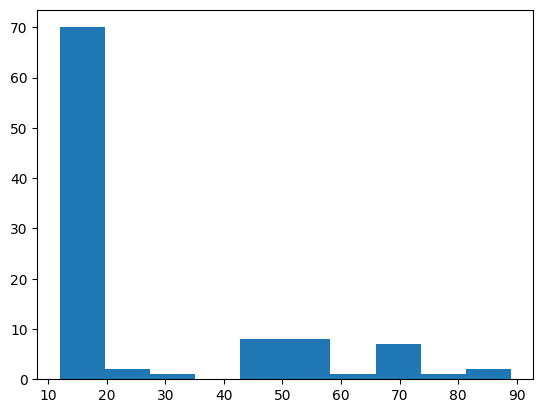

In [51]:
# Code to evaluate suspiciously high LORs
# For these, if we divide LOR by 10, the the catheter is taped around 4-5 cm deeper
# So most likely these suspiciously high LORs are missing decimal points
high_LORs = df.sort_values(by='lor_depth',ascending=False).head(100)['lor_depth']
print(high_LORs.to_list())
plt.hist(high_LORs)

print(df.sort_values(by='lor_depth',ascending=False).head(100)['anes_procedure_catheter_depth_2266'].to_list())

In [52]:
# prompt: lor_depth = lor_depth / 10 if lor_depth > 20

df['lor_depth'] = np.where(df['lor_depth'] > 20, df['lor_depth'] / 10, df['lor_depth'])

[18.0, 17.0, 17.0, 16.0, 16.0, 16.0, 15.5, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.5, 11.5, 11.5, 11.5, 11.0, 11.0, 11.0, 11.0, 11.0]


(array([ 9., 44., 26.,  0.,  7.,  7.,  1.,  3.,  2.,  1.]),
 array([11. , 11.7, 12.4, 13.1, 13.8, 14.5, 15.2, 15.9, 16.6, 17.3, 18. ]),
 <BarContainer object of 10 artists>)

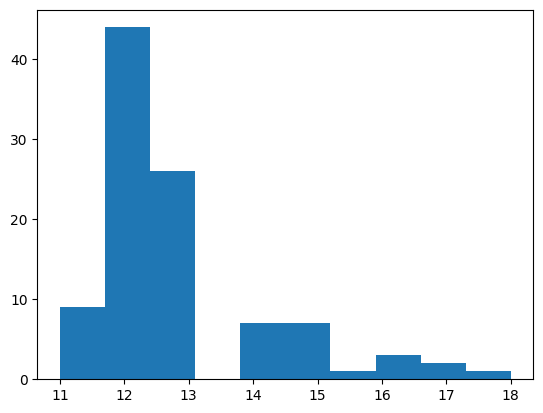

In [53]:
# Code to evaluate suspiciously high LORs
high_LORs = df.sort_values(by='lor_depth',ascending=False).head(100)['lor_depth']
print(high_LORs.to_list())
plt.hist(high_LORs)

## Make numerical columns numerical and plausible

In [54]:
# prompt: set these columns to dtype float: bmi_end_pregnancy_2044, maternal_weight_end_pregnancy_2045, maternal_height_2046,gravidity_2047,parity_2048

# Convert specified columns to float dtype
columns_to_convert = ['gestational_age_2052','bmi_end_pregnancy_2044', 'maternal_weight_end_pregnancy_2045', 'maternal_height_2046', 'gravidity_2047', 'parity_2048','baby_weight_2196','bmi_before_pregnancy_2161','secs_rom_thru_delivery_2197']

for col in columns_to_convert:
    if col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)
        except KeyError:
            print(f"Column '{col}' not found in the DataFrame.")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

In [55]:
# If ROM through Delivery is more than 30 days, assume erroneous and make it NaN
df['rom_thru_delivery_hours'] = df['secs_rom_thru_delivery_2197'] / 3600
df['rom_thru_delivery_hours'] = np.where(df['rom_thru_delivery_hours'] <= 30*24, df['rom_thru_delivery_hours'],np.nan)

Include other limits on plausible data for each feature

## Handle proceduralist names

In [56]:
# Function to regulate names
def regulate_name(name):

    # Remove degrees and titles
    name = re.sub(r',?\s*(md|do|mbbs|phd|ms|mba|mph|msc|crna)\b', '', name, flags=re.IGNORECASE)

    # Split last name and first name if comma exists
    if ',' in name:
        last, first = name.split(',', 1)
        name = f"{first.strip()} {last.strip()}"

    # Remove extra spaces
    name = re.sub(r'\s+', ' ', name).strip()

    # Remove middle names
    parts = name.split()
    if len(parts) > 2 :
      name = f"{parts[0]} {parts[-1]}"

    # Capitalize each part of the name
    name = name.title()

    return name

# Apply the function to regulate names
df['Regulated_Anesthesiologist_Name'] = df['anes_procedure_anesthesiologist_2255'].dropna().apply(regulate_name)
df['Regulated_Resident_Name'] = df['anes_procedure_resident_2256'].dropna().apply(regulate_name)

In [57]:
# prompt: set all blank Regulated_Anesthesiologist_Name and Regulated_Resident_Name to NaN

df['Regulated_Anesthesiologist_Name'] = df['Regulated_Anesthesiologist_Name'].replace('', np.nan)
df['Regulated_Resident_Name'] = df['Regulated_Resident_Name'].replace('', np.nan)

In [58]:
# prompt: For each catheter, count how many (i.e., earlier best_timestamp) catheters were done by that provider (including the current one)

df = df.sort_values('best_timestamp')

df['current_anesthesiologist_catheter_count'] = (
    df.groupby('Regulated_Anesthesiologist_Name')['is_neuraxial_catheter']
      .cumsum()
)

df['current_resident_catheter_count'] = (
    df.groupby('Regulated_Resident_Name')['is_neuraxial_catheter']
      .cumsum()
)

In [59]:
df['highly_experienced_anesthesiologist'] = np.where(df['current_anesthesiologist_catheter_count'] > 500, 'yes',
                                                    np.where(df['current_anesthesiologist_catheter_count'] <= 500, 'no', 'none'))

In [60]:
df['moderately_experienced_anesthesiologist'] = np.where(df['current_anesthesiologist_catheter_count'] > 100, 'yes',
                                                        np.where(df['current_anesthesiologist_catheter_count'] <= 100, 'no', 'none'))

In [61]:
# prompt: set df['highly_experienced_resident'] to 1 if current_resident_catheter_count > 50, to 0 if <= 50, and to -1 if NaN

df['highly_experienced_resident'] = np.where(df['current_resident_catheter_count'] > 50, 'yes',
                                                    np.where(df['current_resident_catheter_count'] <= 50, 'no', 'none'))

## Feature engineering on categorical variables

In [62]:
df['has_scoliosis'] = df['icd_scoliosis_2053'] == True

In [63]:
df['has_dorsalgia'] = df['icd_dorsalgia_2104'] == True

In [64]:
# prompt: create a column "has_back_problems" that is 1 where any of the following are True, else 0. Handle NaN.

# Define the columns related to back problems
back_problem_cols = [
    'icd_scoliosis_2053',
    'icd_spinal_fusion_2056',
    'icd_congenital_deformity_spine_2059',
    'icd_ra_and_sctds_2086',
    'icd_kyphosis_and_lordosis_2089',
    'icd_spinal_osteochondrosis_2092',
    'icd_spondylopathies_and_deforming_dorsopathies_2095',
    'icd_intervertebral_disc_disorders_2098',
    'icd_ehlers_minus_danlos_2101',
]

# Note that spondyolopathies_and_deforming_dorsopathies are by far the biggest contributors

# Create the 'has_back_problems' column
df['has_back_problems'] = df[back_problem_cols].any(axis=1)

In [65]:
df['maternal_race'] = np.select(
    [
        df['maternal_race_2111'] == 'White',
        df['maternal_race_2111'] == 'Asian',
        df['maternal_race_2111'] == 'Black'
    ],
    [
        'White',
        'Asian',
        'Black'
    ],
    default='Other/Unknown'
)

In [66]:
composite_social_columns = [
    "drug_abuse_during_parent_2144",
    "high_risk_social_problems_parent_2154",
    "high_risk_insufficient_antenatal_care_parent_2157",
    "icd_major_mental_health_disorder_2178",
    "education_problems_2203",
    "employment_problems_2206",
    "adverse_occupational_2209",
    "housing_problems_2212",
    "adjustment_problems_2215",
    "relationship_problems_2218",
    "other_psychosocial_2221",
    "smoker_during_pregnancy_parent_2117",
    "drug_abuse_before_parent_2142",
    "alcohol_during_parent_2147",
]

df['composite_psychosocial_problems'] = df[composite_social_columns].any(axis=1)

In [67]:
# prompt: create column 'any_public_insurance' for any row where public_insurance_2114 contains the string "public", ignore case

# Assuming 'df' is your DataFrame.
df['any_public_insurance'] = df['public_insurance_2114'].str.contains('public', case=False, na=False)

In [68]:
# prompt: create a column maternal_language_english for any row where maternal_language is english

# Assuming 'df' is your DataFrame.
df['maternal_language_english'] = df['maternal_language_2113'] == 'english'

In [69]:
# prompt: create a column marital_status_married_or_partner for any row where marital_status_2184 is 'married' or 'partner'

# Assuming 'df' is your DataFrame.
df['marital_status_married_or_partner'] = df['marital_status_2184'].apply(lambda x: True if x in ['married', 'partner'] else False)

In [70]:
# prompt: create a column country_of_origin_USA that is country_of_origin_2186 == united states

# Assuming 'df' is your DataFrame.
df['country_of_origin_USA'] = df['country_of_origin_2186'] == 'united states'

In [71]:
# prompt: create a column employment_status_fulltime that is employment_status_2187 == full time

df['employment_status_fulltime'] = df['employment_status_2187'] == 'full time'

In [72]:
# prompt: create a column epidural_needle_type based on anes_procedure_epidural_needle_2263 that can have values "tuohy","weiss", or "other"

# Create the 'epidural_needle_type' column based on 'anes_procedure_epidural_needle_2263'
df['epidural_needle_type'] = df['anes_procedure_epidural_needle_2263'].map({
    'tuohy': 'tuohy',
    'weiss': 'weiss',
}).fillna('other')

In [73]:
# prompt: create a column paresthesias_present that is anes_procedure_paresthesias_2270 either "transient" or "yes"

# Create the 'paresthesias_present' column
df['paresthesias_present'] = df['anes_procedure_paresthesias_2270'].apply(lambda x: True if x == 'yes' or x == 'transient' else False)

# Save processed data prior to analysis

In [74]:
complete_data = df.copy()

In [75]:
# Save the DataFrame to a pickle file
complete_data.to_pickle("C:\\Users\\dfber\\OneDrive - Mass General Brigham\\Epidural project\\processed_merlin_data.pkl")

In [76]:
# prompt: Import libraries and open CSV

import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt


In [78]:
# Load the pickled DataFrame
complete_data = pd.read_pickle("C:\\Users\\dfber\\OneDrive - Mass General Brigham\\Epidural project\\processed_merlin_data.pkl")
# complete_data = pd.read_pickle("C:\\Users\\User\\OneDrive - Mass General Brigham\\Epidural project\\processed_merlin_data.pkl")

# Now you can work with the DataFrame
complete_data.head()

,id,epic_pmrn,delivery_date,delivery_time,pregnancy_outcome,newborn_gestational_age,gestational_age_2052,anesthesia_epidural_2062,anesthesia_general_2063,anesthesia_local_2064,anesthesia_pudendal_2065,anesthesia_spinal_2066,delivery_site_2188,induction_oxytocin_2189,induction_cervical_balloon_2190,induction_misoprostol_2191,induction_arom_2192,induction_foley_easy_2193,induction_attempted_2194,baby_weight_2196,secs_rom_thru_delivery_2197,tolac_attempted_2233,fetal_presentation_category_2243,fetal_presentation_subcategory_2244,fetal_presentation_subcategory_2245,fetal_presentation_laterality_2246,fetal_presentation_position_2247,bmi_end_pregnancy_2044,bmi_end_pregnancy_units_2044,bmi_end_pregnancy_datetime_2044,maternal_weight_end_pregnancy_2045,maternal_weight_end_pregnancy_units_2045,maternal_weight_end_pregnancy_datetime_2045,maternal_height_2046,maternal_height_units_2046,maternal_height_datetime_2046,bmi_throughout_pregnancy_2160,bmi_throughout_pregnancy_units_2160,bmi_throughout_pregnancy_datetime_2160,bmi_before_pregnancy_2161,bmi_before_pregnancy_units_2161,bmi_before_pregnancy_datetime_2161,weight_throughout_pregnancy_2162,weight_throughout_pregnancy_units_2162,weight_throughout_pregnancy_datetime_2162,weight_before_pregnancy_2163,weight_before_pregnancy_units_2163,weight_before_pregnancy_datetime_2163,bmi_throughout_pregnancy_2164,bmi_throughout_pregnancy_units_2164,bmi_throughout_pregnancy_datetime_2164,timeseries_intrapartum_sbp_2228,timeseries_intrapartum_sbp_units_2228,timeseries_intrapartum_sbp_datetime_2228,timeseries_intrapartum_dbp_2229,timeseries_intrapartum_dbp_units_2229,timeseries_intrapartum_dbp_datetime_2229,timeseries_intrapartum_hr_2241,timeseries_intrapartum_hr_units_2241,timeseries_intrapartum_hr_datetime_2241,timeseries_intrapartum_pain_score_2242,timeseries_intrapartum_pain_score_units_2242,timeseries_intrapartum_pain_score_datetime_2242,icd_coagulation_disorders_2049,icd_scoliosis_2053,icd_spinal_fusion_2056,icd_congenital_deformity_spine_2059,icd_ra_and_sctds_2086,icd_kyphosis_and_lordosis_2089,icd_spinal_osteochondrosis_2092,icd_spondylopathies_and_deforming_dorsopathies_2095,icd_intervertebral_disc_disorders_2098,icd_ehlers_minus_danlos_2101,icd_dorsalgia_2104,icd_other_chronic_pain_2107,icd_ivf_2124,icd_multiple_gestation_2127,icd_c_minus_section_hx_2130,icd_high_risk_current_2133,icd_high_risk_hx_2136,drug_abuse_during_parent_2144,alcohol_before_parent_2151,high_risk_social_problems_parent_2154,high_risk_insufficient_antenatal_care_parent_2157,icd_pet_w_sf_2172,icd_pet_wout_sf_2175,icd_major_mental_health_disorder_2178,icd_preterm_birth_2181,icd_macrosomia_2195,icd_iufd_2200,education_problems_2203,employment_problems_2206,adverse_occupational_2209,housing_problems_2212,adjustment_problems_2215,relationship_problems_2218,other_psychosocial_2221,breech_2225,spontaneous_labor_2230,icd_spondylitis_icd_minus_9_720_2234,icd_spondylosis_icd_minus_9_721_2235,icd_other_dorsopathies_icd_minus_9_724_2236,icd_other_dorsopathies_icd_minus_10_m43_2237,icd_spondylitis_icd_minus_10_m45_minus_46_2238,icd_spondylosis_icd_minus_10_m47_2239,icd_other_spondylopathies_idc_minus_10_m48_minus_2240,public_insurance_2114,private_insurance_2115,zipcode_2185,meds_intrapartum_fentanyl_2165,meds_intrapartum_hydromorphone_2166,meds_intrapartum_morphine_2167,meds_intrapartum_nalbuphine_2168,meds_intrapartum_acetaminophen_2169,meds_intrapartum_ibuprofen_2170,meds_intrapartum_ketorolac_2171,smoker_during_pregnancy_parent_2117,smoker_before_pregnancy_parent_2120,drug_abuse_before_parent_2142,alcohol_during_parent_2147,maternal_race_2111,maternal_ethnicity_2112,gravidity_2047,parity_2048,anes_procedure_type_2253,anes_procedure_start_dts_2254,anes_procedure_anesthesiologist_2255,anes_procedure_resident_2256,anes_procedure_pt_position_2257,anes_procedure_approach_2258,anes_procedure_location_2259,anes_procedure_note_id_2260,anes_procedure_dos_dts_2261,anes_procedure_dpe_2262,anes_procedure_epidural_needle_2263,anes_procedure_epi

In [79]:
df = complete_data.copy()

# Manually analyze some successes and failures

In [80]:
# prompt: Choose 10 random failed_catheters and 10 random non-failed_catheters

# Assuming 'df' is your DataFrame and it contains a column 'failed_catheter'
failed_catheters = df[df['failed_catheter'] == 1]
non_failed_catheters = df[df['failed_catheter'] == 0]

# Randomly choose 10 failed catheters
random_failed_catheters = failed_catheters.sample(n=10, random_state=42)  # random_state for reproducibility
chosen_failed_catheter_encounter_ids = ['3324914343','3272008150','3234765502','3305371022','3216449190','3186345033','3493903332','3285273066','3320528828','3191160118']
chosen_failed_catheters = df[df['anes_procedure_encounter_id_2273'].isin(chosen_failed_catheter_encounter_ids)]

# Randomly choose 10 non-failed catheters
random_non_failed_catheters = non_failed_catheters.sample(n=10, random_state=42) # random_state for reproducibility

In [81]:
column_names = [
    "anes_procedure_encounter_id_2273",
    "best_timestamp",
    "failed_catheter",
    "true_procedure_type",
    "anes_procedure_note_id_2260",
    "subsequent_proof_of_failure_note_id",
    "Regulated_Anesthesiologist_Name",
    "Regulated_Resident_Name"
]

In [82]:
random_failed_catheters[column_names]

,anes_procedure_encounter_id_2273,best_timestamp,failed_catheter,true_procedure_type,anes_procedure_note_id_2260,subsequent_proof_of_failure_note_id,Regulated_Anesthesiologist_Name,Regulated_Resident_Name
158253,3561415029,2023-12-31 10:56:00+00:00,True,epidural,10746922383,['10758378280'],Tong-Yan Chen,Agustin Oneto
113042,3182411661,2018-02-11 21:57:00+00:00,True,epidural,1788592610,['1788911547'],Eric Cappiello,Anna Sheridan
112171,3508444558,2023-05-15 02:23:00+00:00,True,epidural,9414954535,['9415079561'],Kyle Jespersen,Michael Hirschi
96907,3283757686,2020-02-03 22:29:00+00:00,True,epidural,3337633734,['3340699592'],Richard Lawlor,NaN
112493,3222231593,2018-12-19 01:13:00+00:00,True,epidural,2183808175,['2184181227'],Rebecca Minehart,Lizbeeth Lopez
24480,3294059792,2020-04-09 21:17:00+00:00,True,epidural,3669778784,['3669814506'],NaN,NaN
137641,3279604571,2020-01-07 21:14:00+00:00,True,epidural,3214546038,['3215493944'],Jie Zhou,Mckenna Longacre
89696,3352795100,2021-04-10 06:52:00+00:00,True,epidural,5278796212,['5284346181'],Sarah Wiser,NaN
23711,3184260631,2018-03-02 14:39:00+00:00,True,epidural,1808490931,['1808978883'],NaN,NaN
122440,3156936269,2017-07-16 19:10:00+00:00,True,epidural,1518899251,['1520347683'],NaN,NaN


In [83]:
chosen_failed_catheters[column_names]

,anes_procedure_encounter_id_2273,best_timestamp,failed_catheter,true_procedure_type,anes_procedure_note_id_2260,subsequent_proof_of_failure_note_id,Regulated_Anesthesiologist_Name,Regulated_Resident_Name
90428,3186345033,2018-03-19 06:39:00+00:00,True,epidural,1827698916,['1827810492'],Tong-Yan Chen,Kayla Florio
90427,3186345033,2018-03-19 08:17:00+00:00,False,cse,1827810492,None,Tong-Yan Chen,NaN
33948,3191160118,2018-04-26 14:12:00+00:00,False,spinal,1875519865,None,Mihaela Podovei,NaN
33949,3191160118,2018-04-26 15:57:00+00:00,True,epidural,1875532828,['1875559634'],Mihaela Podovei,NaN
33947,3191160118,2018-04-26 19:24:00+00:00,False,epidural,1875559634,None,Mihaela Podovei,NaN
39816,3216449190,2018-11-06 18:26:00+00:00,True,epidural,2126903072,"['2127240380', '2127290497']",NaN,NaN
39817,3216449190,2018-11-07 05:35:00+00:00,True,epidural,2127240380,['2127290497'],Laura Chang,NaN
39814,3216449190,2018-11-07 07:39:00+00:00,False,cse,2127290497,None,Laura Chang,NaN
26063,3234765502,2019-03-25 05:11:00+00:00,True,epidural,2302729884,['2306197611'],Eric Cappiello,Yun-Yun Chen
26064,3234765502,2019-03-27 08:45:00+00:00,False,epidural,2306197611,None,Naida Cole,NaN


In [84]:
random_non_failed_catheters[column_names]

,anes_procedure_encounter_id_2273,best_timestamp,failed_catheter,true_procedure_type,anes_procedure_note_id_2260,subsequent_proof_of_failure_note_id,Regulated_Anesthesiologist_Name,Regulated_Resident_Name
68830,3397655663,2021-11-16 12:20:00+00:00,False,epidural,6465589973,None,Jason Pollard,NaN
48222,NaN,NaT,False,NaN,NaN,NaN,NaN,NaN
10511,3176993482,2017-12-30 17:53:00+00:00,False,epidural,1735114718,None,Nikolai Gonzales,NaN
48703,3083251388,2015-08-19 12:19:00+00:00,False,epidural,475485739,None,Arvind Palanisamy,Jason Lee
5307,NaN,NaT,False,NaN,NaN,NaN,NaN,NaN
27905,3536703737,2023-09-15 15:10:00+00:00,False,epidural,10114198110,None,Bhargavi Krishnan,Jean He
38750,3438196790,2022-06-09 04:44:00+00:00,False,epidural,7562192119,None,Jie Zhou,Alexander Rothkrug
12173,3579024514,2024-03-19 08:42:00+00:00,False,epidural,11212033440,None,Dennis Thapa,NaN
52088,3497747484,2023-03-26 17:51:00+00:00,False,NaN,9129225898,NaN,William Camann,Matthew Russell
116811,3124198030,2016-09-07 02:31:00+00:00,False,epidural,1126196036,None,NaN,NaN


In [85]:
df[df['anes_procedure_encounter_id_2273'] == '3191160118']

,id,epic_pmrn,delivery_date,delivery_time,pregnancy_outcome,newborn_gestational_age,gestational_age_2052,anesthesia_epidural_2062,anesthesia_general_2063,anesthesia_local_2064,anesthesia_pudendal_2065,anesthesia_spinal_2066,delivery_site_2188,induction_oxytocin_2189,induction_cervical_balloon_2190,induction_misoprostol_2191,induction_arom_2192,induction_foley_easy_2193,induction_attempted_2194,baby_weight_2196,secs_rom_thru_delivery_2197,tolac_attempted_2233,fetal_presentation_category_2243,fetal_presentation_subcategory_2244,fetal_presentation_subcategory_2245,fetal_presentation_laterality_2246,fetal_presentation_position_2247,bmi_end_pregnancy_2044,bmi_end_pregnancy_units_2044,bmi_end_pregnancy_datetime_2044,maternal_weight_end_pregnancy_2045,maternal_weight_end_pregnancy_units_2045,maternal_weight_end_pregnancy_datetime_2045,maternal_height_2046,maternal_height_units_2046,maternal_height_datetime_2046,bmi_throughout_pregnancy_2160,bmi_throughout_pregnancy_units_2160,bmi_throughout_pregnancy_datetime_2160,bmi_before_pregnancy_2161,bmi_before_pregnancy_units_2161,bmi_before_pregnancy_datetime_2161,weight_throughout_pregnancy_2162,weight_throughout_pregnancy_units_2162,weight_throughout_pregnancy_datetime_2162,weight_before_pregnancy_2163,weight_before_pregnancy_units_2163,weight_before_pregnancy_datetime_2163,bmi_throughout_pregnancy_2164,bmi_throughout_pregnancy_units_2164,bmi_throughout_pregnancy_datetime_2164,timeseries_intrapartum_sbp_2228,timeseries_intrapartum_sbp_units_2228,timeseries_intrapartum_sbp_datetime_2228,timeseries_intrapartum_dbp_2229,timeseries_intrapartum_dbp_units_2229,timeseries_intrapartum_dbp_datetime_2229,timeseries_intrapartum_hr_2241,timeseries_intrapartum_hr_units_2241,timeseries_intrapartum_hr_datetime_2241,timeseries_intrapartum_pain_score_2242,timeseries_intrapartum_pain_score_units_2242,timeseries_intrapartum_pain_score_datetime_2242,icd_coagulation_disorders_2049,icd_scoliosis_2053,icd_spinal_fusion_2056,icd_congenital_deformity_spine_2059,icd_ra_and_sctds_2086,icd_kyphosis_and_lordosis_2089,icd_spinal_osteochondrosis_2092,icd_spondylopathies_and_deforming_dorsopathies_2095,icd_intervertebral_disc_disorders_2098,icd_ehlers_minus_danlos_2101,icd_dorsalgia_2104,icd_other_chronic_pain_2107,icd_ivf_2124,icd_multiple_gestation_2127,icd_c_minus_section_hx_2130,icd_high_risk_current_2133,icd_high_risk_hx_2136,drug_abuse_during_parent_2144,alcohol_before_parent_2151,high_risk_social_problems_parent_2154,high_risk_insufficient_antenatal_care_parent_2157,icd_pet_w_sf_2172,icd_pet_wout_sf_2175,icd_major_mental_health_disorder_2178,icd_preterm_birth_2181,icd_macrosomia_2195,icd_iufd_2200,education_problems_2203,employment_problems_2206,adverse_occupational_2209,housing_problems_2212,adjustment_problems_2215,relationship_problems_2218,other_psychosocial_2221,breech_2225,spontaneous_labor_2230,icd_spondylitis_icd_minus_9_720_2234,icd_spondylosis_icd_minus_9_721_2235,icd_other_dorsopathies_icd_minus_9_724_2236,icd_other_dorsopathies_icd_minus_10_m43_2237,icd_spondylitis_icd_minus_10_m45_minus_46_2238,icd_spondylosis_icd_minus_10_m47_2239,icd_other_spondylopathies_idc_minus_10_m48_minus_2240,public_insurance_2114,private_insurance_2115,zipcode_2185,meds_intrapartum_fentanyl_2165,meds_intrapartum_hydromorphone_2166,meds_intrapartum_morphine_2167,meds_intrapartum_nalbuphine_2168,meds_intrapartum_acetaminophen_2169,meds_intrapartum_ibuprofen_2170,meds_intrapartum_ketorolac_2171,smoker_during_pregnancy_parent_2117,smoker_before_pregnancy_parent_2120,drug_abuse_before_parent_2142,alcohol_during_parent_2147,maternal_race_2111,maternal_ethnicity_2112,gravidity_2047,parity_2048,anes_procedure_type_2253,anes_procedure_start_dts_2254,anes_procedure_anesthesiologist_2255,anes_procedure_resident_2256,anes_procedure_pt_position_2257,anes_procedure_approach_2258,anes_procedure_location_2259,anes_procedure_note_id_2260,anes_procedure_dos_dts_2261,anes_procedure_dpe_2262,anes_procedure_epidural_needle_2263,anes_procedure_epi

In [86]:
# Filter the DataFrame for failed catheters and delivery location 'mgh'
random_failed_catheters_mgh = df[(df['failed_catheter'] == True) & (df['delivery_site_2188'] == 'mgh')].sample(n=10, random_state=42)

# Display the chosen sample
random_failed_catheters_mgh[column_names]
chosen_failed_catheters_mgh_encounter_ids = ["3268447806", "3396191507", "3258959083", "3581696894", "3271964781", "3583787789", "3402989492", "3476124055", "3304131417", "3522418740"]
chosen_failed_catheter_mgh_note_ids = ['2903598031', '6426160113', '2535157730', '11282242570',
       '3002237621', '11340428769', '6612736939', '8559605944',
       '3947063203', '9788012155']

In [87]:
df[df['anes_procedure_note_id_2260'].isin(chosen_failed_catheter_mgh_note_ids)][column_names]

,anes_procedure_encounter_id_2273,best_timestamp,failed_catheter,true_procedure_type,anes_procedure_note_id_2260,subsequent_proof_of_failure_note_id,Regulated_Anesthesiologist_Name,Regulated_Resident_Name
98644,3258959083,2019-09-03 11:37:00+00:00,True,epidural,2535157730,"['2535640891', '2536024256', '2536182051']",Lisa Leffert,Daewoong Lee
46820,3268447806,2019-11-08 19:51:00+00:00,True,epidural,2903598031,['2905158941'],Rebecca Minehart,NaN
15623,3271964781,2019-11-27 03:50:00+00:00,True,epidural,3002237621,['3002752923'],Kate Cohen,Rupeng Li
64344,3304131417,2020-06-22 08:49:00+00:00,True,epidural,3947063203,['3947625413'],Dan Ellis,Peter Ochieng
46899,3396191507,2021-11-09 10:34:00+00:00,True,epidural,6426160113,['6431936120'],NaN,Yasmin Fatemi
1145,3402989492,2021-12-13 04:15:00+00:00,True,epidural,6612736939,['6612902724'],Emily Naoum,Lukas Matern
76464,3476124055,2022-12-11 08:12:00+00:00,False,NaN,8559605944,NaN,Dan Ellis,Allison Dorogi
76461,3476124055,2022-12-11 08:12:00+00:00,True,epidural,8559605944,"['8561892026', '8566718755']",Dan Ellis,Allison Dorogi
31643,3522418740,2023-07-17 14:22:00+00:00,True,epidural,9788012155,['9789776533'],Hilary Gallin,Ryan Norman
34330,3581696894,2024-03-30 23:01:00+00:00,False,epidural,11282242570,None,Gregory Ginsburg,Carl Pierre


# Reduce Table to Chosen Features

In [88]:
# prompt: print all columns as a list and make it easy to read over multiple lines

# Assuming 'df' is your DataFrame (as defined in the provided code)
all_columns = df.columns.tolist()

# Print the list of columns, formatted for readability
print("Columns of the DataFrame:")
for i, col in enumerate(all_columns):
    print(f"{i+1}. {col} ||| {df[col].dtype}")

Columns of the DataFrame:
1. id ||| int64
2. epic_pmrn ||| int64
3. delivery_date ||| object
4. delivery_time ||| object
5. pregnancy_outcome ||| object
6. newborn_gestational_age ||| float64
7. gestational_age_2052 ||| float64
8. anesthesia_epidural_2062 ||| object
9. anesthesia_general_2063 ||| object
10. anesthesia_local_2064 ||| object
11. anesthesia_pudendal_2065 ||| object
12. anesthesia_spinal_2066 ||| object
13. delivery_site_2188 ||| object
14. induction_oxytocin_2189 ||| bool
15. induction_cervical_balloon_2190 ||| bool
16. induction_misoprostol_2191 ||| bool
17. induction_arom_2192 ||| bool
18. induction_foley_easy_2193 ||| bool
19. induction_attempted_2194 ||| object
20. baby_weight_2196 ||| float64
21. secs_rom_thru_delivery_2197 ||| float64
22. tolac_attempted_2233 ||| object
23. fetal_presentation_category_2243 ||| object
24. fetal_presentation_subcategory_2244 ||| object
25. fetal_presentation_subcategory_2245 ||| object
26. fetal_presentation_laterality_2246 ||| object

In [89]:
chosen_features = [
#    "id",
    "gestational_age_2052",
    "delivery_site_2188",
    "baby_weight_2196",
    "rom_thru_delivery_hours",
    "fetal_presentation_category_2243",
    "fetal_presentation_subcategory_2244",
    "fetal_presentation_position_2247",
    "bmi_end_pregnancy_2044",
    "maternal_weight_end_pregnancy_2045",
    "bmi_before_pregnancy_2161",
#    "zipcode_2185",
    "gravidity_2047",
    "parity_2048",
#    "anes_procedure_note_text_2271",
#    "best_timestamp",
    "true_procedure_type",
    "is_neuraxial_catheter",
    "failed_catheter",
    "dpe",
    "lor_depth",
    "current_resident_catheter_count",
    "highly_experienced_anesthesiologist",
    "highly_experienced_resident",
    "current_anesthesiologist_catheter_count",
    "moderately_experienced_anesthesiologist",
    "has_scoliosis",
    "has_dorsalgia",
    "has_back_problems",
    "maternal_race",
 #   "prior_pain_scores",
    "prior_pain_scores_max",
    "composite_psychosocial_problems",
    "any_public_insurance",
    "maternal_language_english",
    "marital_status_married_or_partner",
    "country_of_origin_USA",
    "employment_status_fulltime",
    "epidural_needle_type",
    "paresthesias_present",
]

In [90]:
df = df[chosen_features]

In [91]:
df = df.replace({True: 1, False: 0})

C:\Users\dfber\AppData\Local\Temp\ipykernel_20900\3074727906.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [92]:
# prompt: print all columns as a list and make it easy to read over multiple lines

all_columns = df.columns.tolist()

# Print the list of columns, formatted for readability
print("Columns of the DataFrame:")
for i, col in enumerate(all_columns):
    print(f"{i+1}. {col} ||| {df[col].dtype}")

Columns of the DataFrame:
1. gestational_age_2052 ||| float64
2. delivery_site_2188 ||| object
3. baby_weight_2196 ||| float64
4. rom_thru_delivery_hours ||| float64
5. fetal_presentation_category_2243 ||| object
6. fetal_presentation_subcategory_2244 ||| object
7. fetal_presentation_position_2247 ||| object
8. bmi_end_pregnancy_2044 ||| float64
9. maternal_weight_end_pregnancy_2045 ||| float64
10. bmi_before_pregnancy_2161 ||| float64
11. gravidity_2047 ||| float64
12. parity_2048 ||| float64
13. true_procedure_type ||| object
14. is_neuraxial_catheter ||| int64
15. failed_catheter ||| int64
16. dpe ||| int64
17. lor_depth ||| float64
18. current_resident_catheter_count ||| float64
19. highly_experienced_anesthesiologist ||| object
20. highly_experienced_resident ||| object
21. current_anesthesiologist_catheter_count ||| float64
22. moderately_experienced_anesthesiologist ||| object
23. has_scoliosis ||| int64
24. has_dorsalgia ||| int64
25. has_back_problems ||| int64
26. maternal_ra

# Download

In [94]:
df.to_csv('minimal_merlin_data.csv', index=False)